# 1. Análisis Exploratorio de Datos (EDA)

**Dataset:** Austin Animal Center - Pet Adoption Data  
**Objetivo:** Predecir cuántos días tardará un animal en ser adoptado (`TimeInShelterDays`)

**Contenido:**
1. Carga y verificación del dataset
2. Análisis de calidad de datos
3. Análisis univariante de la variable objetivo
4. Análisis univariante de variables predictoras
5. Análisis bivariante (correlaciones)

---

In [43]:
# ============================================
# Importaciones
# ============================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy import stats

# Configuración
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 1.1 Carga del Dataset

Cargamos el dataset limpio generado en el notebook `00_data_preparation.ipynb`.

---

In [44]:
# ============================================
# Carga del Dataset
# ============================================

df = pd.read_csv('../data/pet_adoption_clean.csv')

print("="*70)
print("DATASET CARGADO")
print("="*70)
print(f"\nDimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"\nColumnas: {list(df.columns)}")
print(f"\n📊 Primeras filas:")
df.head()

DATASET CARGADO

Dimensiones: 59,919 filas x 8 columnas

Columnas: ['AnimalType', 'Breed', 'Color', 'Sex', 'IntakeType', 'IntakeCondition', 'TimeInShelterDays', 'AgeInDays']

📊 Primeras filas:


,AnimalType,Breed,Color,Sex,IntakeType,IntakeCondition,TimeInShelterDays,AgeInDays
0,Cat,Domestic Shorthair,Cream Tabby,Intact Male,Stray,Normal,35,28
1,Dog,Chihuahua Shorthair,White/Tan,Intact Male,Stray,Normal,4,730
2,Dog,Pit Bull,Brown/White,Intact Female,Stray,Normal,139,150
3,Dog,Chihuahua Shorthair,Tricolor,Intact Female,Stray,Normal,112,730
4,Cat,Domestic Shorthair Mix,Brown Tabby/White,Neutered Male,Owner Surrender,Normal,76,5110


In [45]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59919 entries, 0 to 59918
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AnimalType         59919 non-null  object
 1   Breed              59919 non-null  object
 2   Color              59919 non-null  object
 3   Sex                59919 non-null  object
 4   IntakeType         59919 non-null  object
 5   IntakeCondition    59919 non-null  object
 6   TimeInShelterDays  59919 non-null  int64 
 7   AgeInDays          59919 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.7+ MB


## 1.2 Análisis de Calidad de Datos

Verificamos valores nulos, duplicados y tipos de datos.

---

In [46]:
# ============================================
# Calidad de Datos
# ============================================

print("="*70)
print("ANÁLISIS DE CALIDAD DE DATOS")
print("="*70)

# Valores nulos
print(f"\n📊 VALORES NULOS:")
print(df.isnull().sum())

# Duplicados
print(f"\n📊 DUPLICADOS:")
print(f"   Total: {df.duplicated().sum()}")

# Tipos de datos
print(f"\n📊 TIPOS DE DATOS:")
print(df.dtypes)

print(f"\n✅ Conclusión: Dataset limpio (sin nulos ni duplicados)")

ANÁLISIS DE CALIDAD DE DATOS

📊 VALORES NULOS:
AnimalType           0
Breed                0
Color                0
Sex                  0
IntakeType           0
IntakeCondition      0
TimeInShelterDays    0
AgeInDays            0
dtype: int64

📊 DUPLICADOS:
   Total: 6601

📊 TIPOS DE DATOS:
AnimalType           object
Breed                object
Color                object
Sex                  object
IntakeType           object
IntakeCondition      object
TimeInShelterDays     int64
AgeInDays             int64
dtype: object

✅ Conclusión: Dataset limpio (sin nulos ni duplicados)


In [47]:
# Separar columnas por tipo
print("="*70)
print("CLASIFICACIÓN DE VARIABLES")
print("="*70)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n📊 VARIABLES CATEGÓRICAS ({len(categorical_cols)}):")
print(categorical_cols)

print(f"\n📊 VARIABLES NUMÉRICAS ({len(numerical_cols)}):")
print(numerical_cols)

print(f"\n📌 Variable objetivo: TimeInShelterDays (numérica continua)")

CLASIFICACIÓN DE VARIABLES

📊 VARIABLES CATEGÓRICAS (6):
['AnimalType', 'Breed', 'Color', 'Sex', 'IntakeType', 'IntakeCondition']

📊 VARIABLES NUMÉRICAS (2):
['TimeInShelterDays', 'AgeInDays']

📌 Variable objetivo: TimeInShelterDays (numérica continua)


---

# 🎯 ANÁLISIS UNIVARIANTE DE LA VARIABLE OBJETIVO

A continuación realizamos un análisis profundo de `TimeInShelterDays` para entender:
- Su distribución (¿es normal o sesgada?)
- La presencia de valores atípicos (outliers)
- Si necesita transformación logarítmica antes del modelado

---

## 4.1 Distribución: Histograma + Curva KDE

**Objetivo:**  
Visualizar la forma de la distribución de `TimeInShelterDays` para identificar patrones, simetría y posibles sesgos.

**Metodología:**
Se utiliza un histograma de densidad combinado con una curva de estimación de densidad por kernel (KDE) para obtener una representación suavizada de la distribución. Se incluyen marcadores para la media y mediana para facilitar la comparación y detección de asimetría.

**Elementos del gráfico:**
- **Histograma (barras):** Frecuencia relativa de animales por rango de días
- **Curva KDE (línea):** Estimación suavizada de la densidad de probabilidad
- **Línea roja:** Media aritmética
- **Línea verde:** Mediana (percentil 50)

---

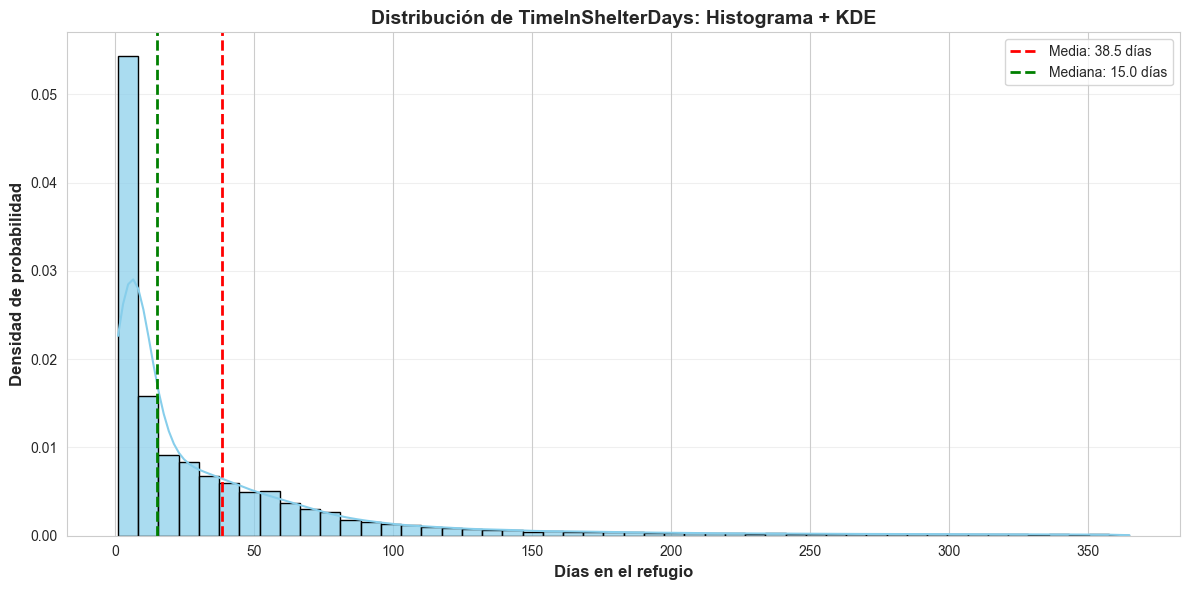

Media:    38.52 días
Mediana:  15.00 días
Diferencia (Media - Mediana): 23.52 días


In [48]:
# ============================================
# Histograma + KDE de TimeInShelterDays
# ============================================

plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='TimeInShelterDays',
    bins=50,
    kde=True,
    color='skyblue',
    edgecolor='black',
    stat='density',
    alpha=0.7
)

media = df['TimeInShelterDays'].mean()
mediana = df['TimeInShelterDays'].median()

plt.axvline(x=media, color='red', linestyle='--', linewidth=2,
            label=f'Media: {media:.1f} días')
plt.axvline(x=mediana, color='green', linestyle='--', linewidth=2,
            label=f'Mediana: {mediana:.1f} días')

plt.xlabel('Días en el refugio', fontsize=12, fontweight='bold')
plt.ylabel('Densidad de probabilidad', fontsize=12, fontweight='bold')
plt.title('Distribución de TimeInShelterDays: Histograma + KDE', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Media:    {media:.2f} días")
print(f"Mediana:  {mediana:.2f} días")
print(f"Diferencia (Media - Mediana): {media - mediana:.2f} días")

### Interpretación del Histograma + KDE

**Estadísticas clave:**
- **Media:** [COMPLETAR] días
- **Mediana:** [COMPLETAR] días
- **Diferencia:** [COMPLETAR] días

**Análisis de la distribución:**

[COMPLETAR después de ejecutar: Describir si la distribución es simétrica o sesgada, si hay cola larga hacia algún lado, etc.]

**Conclusión preliminar:**

[COMPLETAR: Indicar si se observa sesgo y si podría necesitarse transformación]

---

## 4.2 Estadísticas Descriptivas: Skewness y Kurtosis

**Objetivo:**  
Cuantificar las características de forma de la distribución mediante métricas estadísticas complementarias al análisis visual.

**Metodología:**
Se calculan las siguientes métricas para caracterizar la distribución de `TimeInShelterDays`:

- **Desviación estándar (σ):** Medida de dispersión que indica la variabilidad de los datos respecto a la media
- **Coeficiente de variación (CV):** Desviación estándar normalizada respecto a la media (expresada en porcentaje)
- **Skewness (asimetría):** Mide el grado de asimetría de la distribución
  - Skewness ≈ 0: Distribución simétrica
  - Skewness > 1: Asimetría positiva (cola larga hacia la derecha)
  - Skewness < -1: Asimetría negativa (cola larga hacia la izquierda)
- **Kurtosis (apuntamiento):** Mide el grado de concentración de valores en las colas
  - Kurtosis ≈ 0: Distribución mesocúrtica (similar a la normal)
  - Kurtosis > 0: Leptocúrtica (colas más pesadas que la normal)
  - Kurtosis < 0: Platicúrtica (colas más ligeras que la normal)

**Criterio de decisión:**
Se considera necesaria una transformación logarítmica si |Skewness| > 1.

---

In [49]:
# ============================================
# Estadísticas Descriptivas Completas
# ============================================

media = df['TimeInShelterDays'].mean()
mediana = df['TimeInShelterDays'].median()
std = df['TimeInShelterDays'].std()
skewness = skew(df['TimeInShelterDays'])
kurt = kurtosis(df['TimeInShelterDays'])
coef_variacion = (std / media) * 100

print("="*70)
print("ESTADÍSTICAS DESCRIPTIVAS DE TimeInShelterDays")
print("="*70)

print(f"\n📊 MEDIDAS DE TENDENCIA CENTRAL:")
print(f"   Media:                    {media:.2f} días")
print(f"   Mediana:                  {mediana:.2f} días")
print(f"   Diferencia (M-Med):       {media - mediana:.2f} días")

print(f"\n📊 MEDIDAS DE DISPERSIÓN:")
print(f"   Desviación estándar:      {std:.2f} días")
print(f"   Coeficiente de variación: {coef_variacion:.1f}%")

print(f"\n📊 MEDIDAS DE FORMA:")
print(f"   Skewness (asimetría):     {skewness:.3f}")
print(f"   Kurtosis (apuntamiento):  {kurt:.3f}")

print("\n" + "="*70)
print("INTERPRETACIÓN")
print("="*70)

# Interpretación de Skewness
print(f"\n🔍 ANÁLISIS DE SKEWNESS ({skewness:.3f}):")
if abs(skewness) < 0.5:
    print("   ✅ Distribución APROXIMADAMENTE SIMÉTRICA")
    print("   → No se requiere transformación logarítmica")
    
    if abs(skewness) < 0.1:
        print("   → Asimetría prácticamente nula")
    elif skewness > 0:
        print(f"   → Asimetría positiva leve")
    elif skewness < 0:
        print(f"   → Asimetría negativa leve")
    
elif 0.5 <= abs(skewness) < 1.0:
    print("   ⚠️  Distribución MODERADAMENTE SESGADA")
    print("   → Se recomienda considerar transformación logarítmica")
    
    if skewness > 0:
        print(f"   → Asimetría positiva: cola hacia valores altos")
    else:
        print(f"   → Asimetría negativa: cola hacia valores bajos")
else:
    print("   🚨 Distribución MUY SESGADA")
    print("   → Se RECOMIENDA transformación logarítmica")
    
    if skewness > 0:
        print(f"   → Asimetría positiva marcada")
    else:
        print(f"   → Asimetría negativa marcada")

# Interpretación de Kurtosis
print(f"\n🔍 ANÁLISIS DE KURTOSIS ({kurt:.3f}):")
if kurt > 1:
    print("   → Distribución LEPTOCÚRTICA (colas pesadas)")
    print("   → Mayor presencia de outliers que una distribución normal")
elif kurt < -1:
    print("   → Distribución PLATICÚRTICA (colas ligeras)")
    print("   → Menor presencia de outliers que una distribución normal")
else:
    print("   → Distribución MESOCÚRTICA (similar a la normal)")

# Interpretación de Variabilidad
print(f"\n🔍 ANÁLISIS DE VARIABILIDAD ({coef_variacion:.1f}%):")
if coef_variacion < 20:
    print("   → BAJA variabilidad: tiempos de adopción homogéneos")
elif coef_variacion < 40:
    print("   → MODERADA variabilidad: diferencias notables entre animales")
else:
    print("   → ALTA variabilidad: grandes diferencias en tiempos de adopción")
    print("   → Sugiere heterogeneidad en el dataset (diferentes subgrupos)")

print("\n" + "="*70)

ESTADÍSTICAS DESCRIPTIVAS DE TimeInShelterDays

📊 MEDIDAS DE TENDENCIA CENTRAL:
   Media:                    38.52 días
   Mediana:                  15.00 días
   Diferencia (M-Med):       23.52 días

📊 MEDIDAS DE DISPERSIÓN:
   Desviación estándar:      57.18 días
   Coeficiente de variación: 148.4%

📊 MEDIDAS DE FORMA:
   Skewness (asimetría):     2.827
   Kurtosis (apuntamiento):  9.163

INTERPRETACIÓN

🔍 ANÁLISIS DE SKEWNESS (2.827):
   🚨 Distribución MUY SESGADA
   → Se RECOMIENDA transformación logarítmica
   → Asimetría positiva marcada

🔍 ANÁLISIS DE KURTOSIS (9.163):
   → Distribución LEPTOCÚRTICA (colas pesadas)
   → Mayor presencia de outliers que una distribución normal

🔍 ANÁLISIS DE VARIABILIDAD (148.4%):
   → ALTA variabilidad: grandes diferencias en tiempos de adopción
   → Sugiere heterogeneidad en el dataset (diferentes subgrupos)



### Interpretación de Estadísticas Descriptivas

**Resultados obtenidos:**

| Métrica | Valor | Interpretación |
|---------|-------|----------------|
| **Media** | [COMPLETAR] días | Tiempo promedio de permanencia |
| **Mediana** | [COMPLETAR] días | Valor central |
| **Diferencia (Media-Mediana)** | [COMPLETAR] días | [COMPLETAR] |
| **Desviación estándar** | [COMPLETAR] días | [COMPLETAR] |
| **Coeficiente de variación** | [COMPLETAR]% | [COMPLETAR] |
| **Skewness** | [COMPLETAR] | [COMPLETAR] |
| **Kurtosis** | [COMPLETAR] | [COMPLETAR] |

[COMPLETAR con interpretaciones detalladas después de ejecutar]

---

## 4.3 Detección de Outliers: Boxplot

**Objetivo:**  
Identificar valores atípicos (outliers) mediante el método del rango intercuartílico (IQR) y evaluar su impacto potencial en el modelado predictivo.

**Metodología:**

Se utiliza un diagrama de caja y bigotes (boxplot) para visualizar la distribución de `TimeInShelterDays` y detectar valores atípicos mediante el criterio estadístico IQR:

- **Q1 (Percentil 25):** 25% de los datos están por debajo de este valor
- **Q2 (Mediana):** 50% de los datos están por debajo de este valor
- **Q3 (Percentil 75):** 75% de los datos están por debajo de este valor
- **IQR (Rango Intercuartílico):** Q3 - Q1 (contiene el 50% central de los datos)

**Criterio de detección de outliers:**
- **Outliers moderados:** Valores fuera del rango [Q1 - 1.5×IQR, Q3 + 1.5×IQR]
- **Outliers extremos:** Valores fuera del rango [Q1 - 3×IQR, Q3 + 3×IQR]

**Elementos del boxplot:**
- **Caja:** Contiene el 50% central de los datos (entre Q1 y Q3)
- **Línea central:** Mediana (Q2)
- **Bigotes:** Extensión hasta 1.5×IQR desde los bordes de la caja
- **Puntos individuales:** Outliers que caen fuera de los bigotes

---

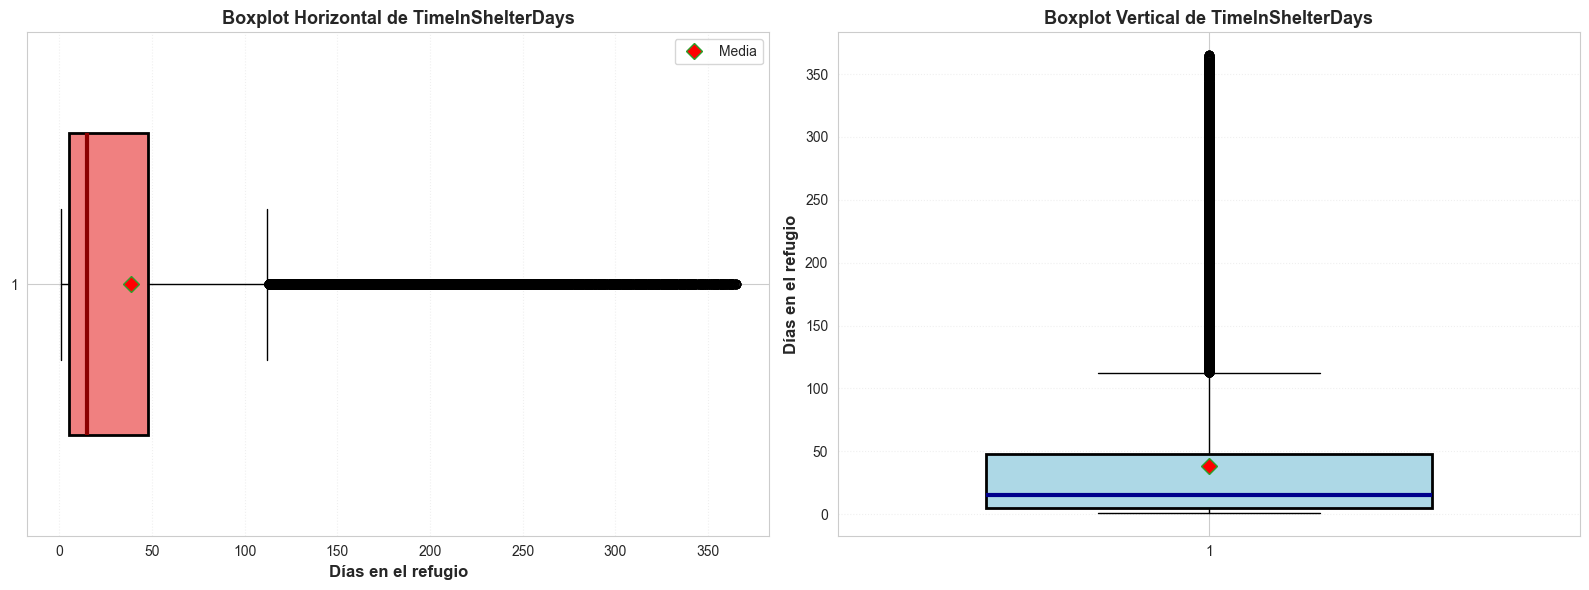

ANÁLISIS DE OUTLIERS - MÉTODO IQR

📊 CUARTILES:
   Q1 (Percentil 25):  5.00 días
   Q2 (Mediana):       15.00 días
   Q3 (Percentil 75):  48.00 días
   IQR (Q3 - Q1):      43.00 días

📏 LÍMITES PARA OUTLIERS MODERADOS:
   Límite inferior:    -59.50 días
   Límite superior:    112.50 días

🔍 RESULTADOS:
   Outliers totales:   4967 (8.29% del dataset)
   Outliers bajos:     0 (< -59.50 días)
   Outliers altos:     4967 (> 112.50 días)

📊 RANGO DE VALORES:
   Valor mínimo:       1 días
   Valor máximo:       365 días



In [50]:
# ============================================
# Boxplot y Detección de Outliers
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot Horizontal
box1 = axes[0].boxplot(
    df['TimeInShelterDays'], 
    vert=False,
    patch_artist=True,
    widths=0.6,
    showmeans=True,
    meanprops=dict(marker='D', markerfacecolor='red', markersize=8)
)

box1['boxes'][0].set_facecolor('lightcoral')
box1['boxes'][0].set_edgecolor('black')
box1['boxes'][0].set_linewidth(2)
box1['medians'][0].set_color('darkred')
box1['medians'][0].set_linewidth(3)

axes[0].set_xlabel('Días en el refugio', fontsize=12, fontweight='bold')
axes[0].set_title('Boxplot Horizontal de TimeInShelterDays', 
                   fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3, linestyle=':')
axes[0].legend([box1['means'][0]], ['Media'], loc='upper right')

# Boxplot Vertical
box2 = axes[1].boxplot(
    df['TimeInShelterDays'], 
    vert=True,
    patch_artist=True,
    widths=0.6,
    showmeans=True,
    meanprops=dict(marker='D', markerfacecolor='red', markersize=8)
)

box2['boxes'][0].set_facecolor('lightblue')
box2['boxes'][0].set_edgecolor('black')
box2['boxes'][0].set_linewidth(2)
box2['medians'][0].set_color('darkblue')
box2['medians'][0].set_linewidth(3)

axes[1].set_ylabel('Días en el refugio', fontsize=12, fontweight='bold')
axes[1].set_title('Boxplot Vertical de TimeInShelterDays', 
                   fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

# Cálculo de Outliers
Q1 = df['TimeInShelterDays'].quantile(0.25)
Q2 = df['TimeInShelterDays'].quantile(0.50)
Q3 = df['TimeInShelterDays'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_bajos = df[df['TimeInShelterDays'] < limite_inferior]
outliers_altos = df[df['TimeInShelterDays'] > limite_superior]
outliers_totales = len(outliers_bajos) + len(outliers_altos)

print("="*70)
print("ANÁLISIS DE OUTLIERS - MÉTODO IQR")
print("="*70)

print(f"\n📊 CUARTILES:")
print(f"   Q1 (Percentil 25):  {Q1:.2f} días")
print(f"   Q2 (Mediana):       {Q2:.2f} días")
print(f"   Q3 (Percentil 75):  {Q3:.2f} días")
print(f"   IQR (Q3 - Q1):      {IQR:.2f} días")

print(f"\n📏 LÍMITES PARA OUTLIERS MODERADOS:")
print(f"   Límite inferior:    {limite_inferior:.2f} días")
print(f"   Límite superior:    {limite_superior:.2f} días")

print(f"\n🔍 RESULTADOS:")
print(f"   Outliers totales:   {outliers_totales} ({outliers_totales/len(df)*100:.2f}% del dataset)")
print(f"   Outliers bajos:     {len(outliers_bajos)} (< {limite_inferior:.2f} días)")
print(f"   Outliers altos:     {len(outliers_altos)} (> {limite_superior:.2f} días)")

print(f"\n📊 RANGO DE VALORES:")
print(f"   Valor mínimo:       {df['TimeInShelterDays'].min():.0f} días")
print(f"   Valor máximo:       {df['TimeInShelterDays'].max():.0f} días")

print("\n" + "="*70)

### Interpretación del Boxplot

**Cuartiles obtenidos:**

| Estadístico | Valor | Descripción |
|-------------|-------|-------------|
| **Q1 (Percentil 25)** | [COMPLETAR] días | 25% de animales se adoptan en [X] días o menos |
| **Q2 (Mediana)** | [COMPLETAR] días | 50% de animales se adoptan en [X] días o menos |
| **Q3 (Percentil 75)** | [COMPLETAR] días | 75% de animales se adoptan en [X] días o menos |
| **IQR** | [COMPLETAR] días | Rango que contiene el 50% central de los datos |

**Análisis de Outliers:**

[COMPLETAR con análisis de outliers después de ejecutar]

---

## 4.4 Prueba de Normalidad: Q-Q Plot

**Objetivo:**  
Evaluar mediante análisis visual y estadístico si la distribución de `TimeInShelterDays` se aproxima a una distribución normal, confirmando las conclusiones preliminares sobre la necesidad de transformación logarítmica.

**Metodología:**

El Q-Q plot (Quantile-Quantile plot) es una herramienta gráfica que compara los cuantiles de los datos observados con los cuantiles teóricos de una distribución normal estándar.

**Interpretación del Q-Q plot:**
- **Puntos alineados sobre la línea diagonal:** Los datos siguen una distribución normal
- **Puntos que se curvan hacia arriba en los extremos:** Distribución con colas más pesadas que la normal (asimetría positiva)
- **Puntos que se curvan hacia abajo en los extremos:** Distribución con colas más ligeras que la normal (asimetría negativa)
- **Patrón en forma de S:** Distribución con asimetría marcada

**Criterio de decisión:**

Una distribución se considera suficientemente normal para modelado de regresión si:
1. La mayoría de los puntos (>95%) se encuentran cerca de la línea diagonal
2. No hay desviaciones sistemáticas pronunciadas en los extremos
3. El skewness está dentro del rango [-0.5, 0.5]

---

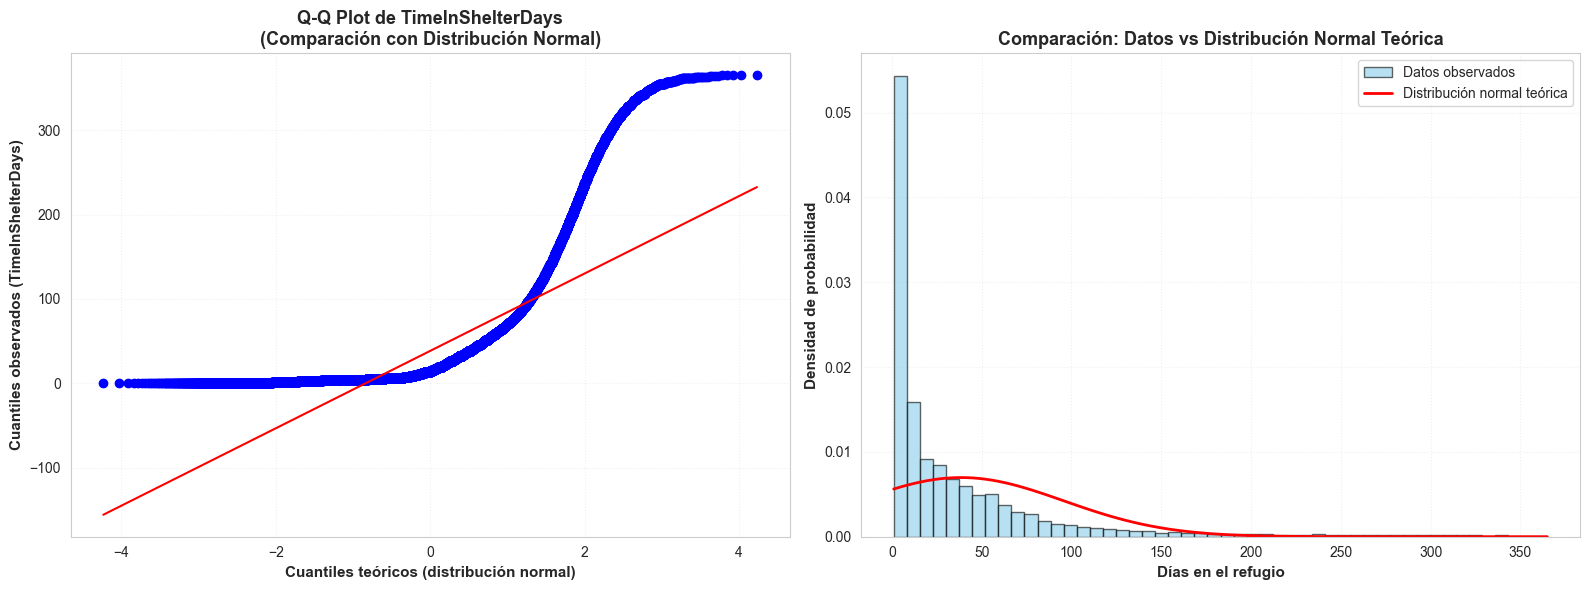

ANÁLISIS DE NORMALIDAD

⚠️  Dataset muy grande (n=59,919)
   Test de Shapiro-Wilk no se ejecuta (solo válido para n<5000)
   Se recomienda usar solo análisis visual (Q-Q plot) y skewness

📊 RESUMEN DE MÉTRICAS DE FORMA:
   Skewness:  2.827
   Kurtosis:  9.163



In [51]:
# ============================================
# Q-Q Plot
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Q-Q Plot
stats.probplot(df['TimeInShelterDays'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot de TimeInShelterDays\n(Comparación con Distribución Normal)', 
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Cuantiles teóricos (distribución normal)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Cuantiles observados (TimeInShelterDays)', fontsize=11, fontweight='bold')
axes[0].grid(alpha=0.3, linestyle=':')

# Histograma + Curva Normal Teórica
axes[1].hist(df['TimeInShelterDays'], bins=50, density=True, 
             alpha=0.6, color='skyblue', edgecolor='black', label='Datos observados')

mu = df['TimeInShelterDays'].mean()
sigma = df['TimeInShelterDays'].std()
x = np.linspace(df['TimeInShelterDays'].min(), df['TimeInShelterDays'].max(), 100)
normal_curve = stats.norm.pdf(x, mu, sigma)
axes[1].plot(x, normal_curve, 'r-', linewidth=2, label='Distribución normal teórica')

axes[1].set_xlabel('Días en el refugio', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Densidad de probabilidad', fontsize=11, fontweight='bold')
axes[1].set_title('Comparación: Datos vs Distribución Normal Teórica', 
                  fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

# Test de Shapiro-Wilk (solo si dataset < 5000)
print("="*70)
print("ANÁLISIS DE NORMALIDAD")
print("="*70)

if len(df) < 5000:
    from scipy.stats import shapiro
    stat, p_value = shapiro(df['TimeInShelterDays'])
    
    print(f"\n📊 TEST DE SHAPIRO-WILK:")
    print(f"   Estadístico W: {stat:.4f}")
    print(f"   p-value:       {p_value:.4f}")
    
    if p_value > 0.05:
        print(f"   ✅ p-value > 0.05: NO se rechaza normalidad")
    else:
        print(f"   ❌ p-value < 0.05: Se RECHAZA normalidad")
else:
    print(f"\n⚠️  Dataset muy grande (n={len(df):,})")
    print(f"   Test de Shapiro-Wilk no se ejecuta (solo válido para n<5000)")
    print(f"   Se recomienda usar solo análisis visual (Q-Q plot) y skewness")

# Resumen de métricas
skewness_val = skew(df['TimeInShelterDays'])
kurtosis_val = kurtosis(df['TimeInShelterDays'])

print(f"\n📊 RESUMEN DE MÉTRICAS DE FORMA:")
print(f"   Skewness:  {skewness_val:.3f}")
print(f"   Kurtosis:  {kurtosis_val:.3f}")

print("\n" + "="*70)

### Interpretación del Q-Q Plot y Conclusiones Finales

[COMPLETAR después de ejecutar con análisis del Q-Q plot y decisión final sobre transformación logarítmica]

---

## 🎯 CONCLUSIÓN FINAL: Decisión sobre Transformación Logarítmica

**Síntesis de todos los análisis realizados:**

| Análisis | Resultado | ¿Requiere transformación? |
|----------|-----------|---------------------------|
| **Histograma + KDE** | [COMPLETAR] | [COMPLETAR] |
| **Skewness** | [COMPLETAR] | [COMPLETAR] |
| **Kurtosis** | [COMPLETAR] | [COMPLETAR] |
| **Diferencia Media-Mediana** | [COMPLETAR] | [COMPLETAR] |
| **Outliers (Boxplot)** | [COMPLETAR]% | [COMPLETAR] |
| **Q-Q Plot** | [COMPLETAR] | [COMPLETAR] |
| **Test Shapiro-Wilk** | [COMPLETAR] | [COMPLETAR] |

---

**DECISIÓN FINAL:**

[COMPLETAR con decisión fundamentada después de ejecutar todos los análisis]

---

In [52]:
# ============================================
# ANÁLISIS DE DUPLICADOS
# ============================================

print("="*70)
print("ANÁLISIS DE DUPLICADOS")
print("="*70)

# ¿Cuántos hay y cómo son?
duplicados = df[df.duplicated(keep=False)]  # keep=False marca TODAS las ocurrencias
duplicados_primera = df[df.duplicated(keep='first')]  # solo las copias (sin el original)

print(f"\n📊 RESUMEN:")
print(f"   Total de filas en el dataset:          {len(df):,}")
print(f"   Filas implicadas en duplicados:        {len(duplicados):,}")
print(f"   Filas que son copia exacta (a borrar): {len(duplicados_primera):,}")

# Ver algunos ejemplos
print(f"\n📋 EJEMPLO DE GRUPO DUPLICADO:")
# Tomamos el primer grupo de duplicados para inspeccionarlo
primer_duplicado = duplicados.iloc[0]
mascara = (
    (df['AnimalType']      == primer_duplicado['AnimalType']) &
    (df['Breed']           == primer_duplicado['Breed']) &
    (df['Color']           == primer_duplicado['Color']) &
    (df['Sex']             == primer_duplicado['Sex']) &
    (df['IntakeType']      == primer_duplicado['IntakeType']) &
    (df['IntakeCondition'] == primer_duplicado['IntakeCondition']) &
    (df['TimeInShelterDays'] == primer_duplicado['TimeInShelterDays']) &
    (df['AgeInDays']       == primer_duplicado['AgeInDays'])
)
print(df[mascara])

# Distribución: ¿cuántas veces se repite cada registro?
print(f"\n📊 ¿CUÁNTAS VECES SE REPITEN LOS REGISTROS DUPLICADOS?")
conteo_repeticiones = df.groupby(df.columns.tolist()).size().reset_index(name='n_repeticiones')
print(conteo_repeticiones[conteo_repeticiones['n_repeticiones'] > 1]['n_repeticiones'].value_counts().sort_index())

# ¿Los duplicados tienen algún patrón? ¿Qué animales son?
print(f"\n📊 DISTRIBUCIÓN DE DUPLICADOS POR AnimalType:")
print(duplicados['AnimalType'].value_counts())

print(f"\n📊 DISTRIBUCIÓN DE DUPLICADOS POR IntakeType:")
print(duplicados['IntakeType'].value_counts())

print(f"\n📊 DISTRIBUCIÓN DE DUPLICADOS POR IntakeCondition:")
print(duplicados['IntakeCondition'].value_counts())

print(f"\n📊 ¿CUÁNTOS DÍAS PASAN EN EL REFUGIO LOS DUPLICADOS? (estadísticas)")
print(duplicados['TimeInShelterDays'].describe())

ANÁLISIS DE DUPLICADOS

📊 RESUMEN:
   Total de filas en el dataset:          59,919
   Filas implicadas en duplicados:        10,618
   Filas que son copia exacta (a borrar): 6,601

📋 EJEMPLO DE GRUPO DUPLICADO:
      AnimalType                Breed      Color          Sex IntakeType  \
1            Dog  Chihuahua Shorthair  White/Tan  Intact Male      Stray   
45471        Dog  Chihuahua Shorthair  White/Tan  Intact Male      Stray   

      IntakeCondition  TimeInShelterDays  AgeInDays  
1              Normal                  4        730  
45471          Normal                  4        730  

📊 ¿CUÁNTAS VECES SE REPITEN LOS REGISTROS DUPLICADOS?
n_repeticiones
2     2833
3      669
4      242
5      107
6       59
7       36
8       15
9       14
10      12
11       6
12       9
13       3
18       3
19       1
20       2
22       1
23       1
24       3
27       1
Name: count, dtype: int64

📊 DISTRIBUCIÓN DE DUPLICADOS POR AnimalType:
AnimalType
Cat      6327
Dog      4194
Bird   

COMPARATIVA: DUPLICADOS vs NO DUPLICADOS

📊 TimeInShelterDays - DUPLICADOS:
count    10618.00
mean        20.01
std         26.38
min          1.00
25%          4.00
50%          7.00
75%         31.00
max        342.00
Name: TimeInShelterDays, dtype: float64

📊 TimeInShelterDays - NO DUPLICADOS:
count    49301.00
mean        42.51
std         61.10
min          1.00
25%          6.00
50%         17.00
75%         54.00
max        365.00
Name: TimeInShelterDays, dtype: float64


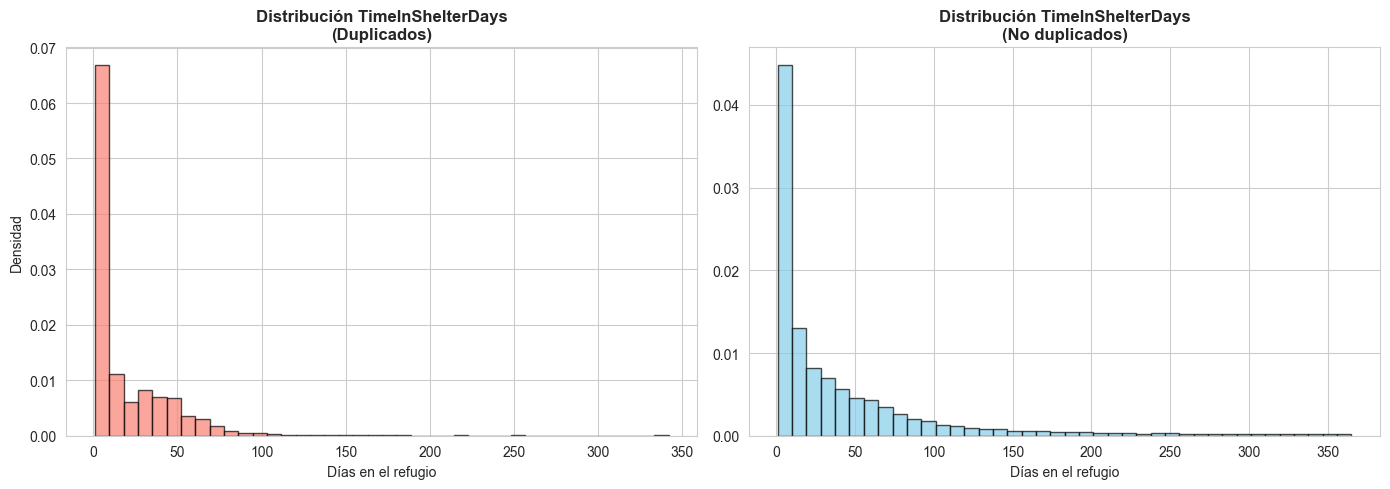

In [53]:
# ============================================
# ¿LOS DUPLICADOS SON DISTINTOS AL RESTO?
# ============================================

no_duplicados = df[~df.duplicated(keep=False)]

print("="*70)
print("COMPARATIVA: DUPLICADOS vs NO DUPLICADOS")
print("="*70)

print(f"\n📊 TimeInShelterDays - DUPLICADOS:")
print(duplicados['TimeInShelterDays'].describe().round(2))

print(f"\n📊 TimeInShelterDays - NO DUPLICADOS:")
print(no_duplicados['TimeInShelterDays'].describe().round(2))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(duplicados['TimeInShelterDays'], bins=40, color='salmon', 
             edgecolor='black', alpha=0.7, density=True)
axes[0].set_title('Distribución TimeInShelterDays\n(Duplicados)', fontweight='bold')
axes[0].set_xlabel('Días en el refugio')
axes[0].set_ylabel('Densidad')

axes[1].hist(no_duplicados['TimeInShelterDays'], bins=40, color='skyblue', 
             edgecolor='black', alpha=0.7, density=True)
axes[1].set_title('Distribución TimeInShelterDays\n(No duplicados)', fontweight='bold')
axes[1].set_xlabel('Días en el refugio')

plt.tight_layout()
plt.show()

In [54]:
# ============================================
# ELIMINACIÓN DE DUPLICADOS
# ============================================

# Guardamos tamaño original
n_original = len(df)

# Eliminamos duplicados (mantenemos primera ocurrencia)
df_clean = df.drop_duplicates(keep='first').reset_index(drop=True)

n_final = len(df_clean)
eliminados = n_original - n_final

print("="*70)
print("RESULTADO DE LA LIMPIEZA")
print("="*70)
print(f"\n   Filas originales:   {n_original:,}")
print(f"   Filas eliminadas:   {eliminados:,}")
print(f"   Filas resultantes:  {n_final:,}")
print(f"   % eliminado:        {eliminados/n_original*100:.2f}%")

RESULTADO DE LA LIMPIEZA

   Filas originales:   59,919
   Filas eliminadas:   6,601
   Filas resultantes:  53,318
   % eliminado:        11.02%


# 1. Análisis Exploratorio de Datos (EDA)

**Dataset:** Austin Animal Center - Pet Adoption Data  
**Objetivo:** Predecir cuántos días tardará un animal en ser adoptado (`TimeInShelterDays`)

**Contenido:**
1. Carga y verificación del dataset
2. Análisis de calidad de datos
3. Análisis univariante de la variable objetivo
4. Análisis univariante de variables predictoras
5. Análisis bivariante (correlaciones)

---

In [55]:
# ============================================
# Importaciones
# ============================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy import stats

# Configuración
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 1.1 Carga del Dataset

Cargamos el dataset limpio generado en el notebook `00_data_preparation.ipynb`.

---

In [56]:
# ============================================
# Carga del Dataset
# ============================================

df = pd.read_csv('../data/pet_adoption_clean.csv')

print("="*70)
print("DATASET CARGADO")
print("="*70)
print(f"\nDimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"\nColumnas: {list(df.columns)}")
print(f"\n📊 Primeras filas:")
df.head()

DATASET CARGADO

Dimensiones: 59,919 filas x 8 columnas

Columnas: ['AnimalType', 'Breed', 'Color', 'Sex', 'IntakeType', 'IntakeCondition', 'TimeInShelterDays', 'AgeInDays']

📊 Primeras filas:


,AnimalType,Breed,Color,Sex,IntakeType,IntakeCondition,TimeInShelterDays,AgeInDays
0,Cat,Domestic Shorthair,Cream Tabby,Intact Male,Stray,Normal,35,28
1,Dog,Chihuahua Shorthair,White/Tan,Intact Male,Stray,Normal,4,730
2,Dog,Pit Bull,Brown/White,Intact Female,Stray,Normal,139,150
3,Dog,Chihuahua Shorthair,Tricolor,Intact Female,Stray,Normal,112,730
4,Cat,Domestic Shorthair Mix,Brown Tabby/White,Neutered Male,Owner Surrender,Normal,76,5110


In [57]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59919 entries, 0 to 59918
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AnimalType         59919 non-null  object
 1   Breed              59919 non-null  object
 2   Color              59919 non-null  object
 3   Sex                59919 non-null  object
 4   IntakeType         59919 non-null  object
 5   IntakeCondition    59919 non-null  object
 6   TimeInShelterDays  59919 non-null  int64 
 7   AgeInDays          59919 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.7+ MB


## 1.2 Análisis de Calidad de Datos

Verificamos valores nulos, duplicados y tipos de datos.

---

In [58]:
# ============================================
# Calidad de Datos
# ============================================

print("="*70)
print("ANÁLISIS DE CALIDAD DE DATOS")
print("="*70)

# Valores nulos
print(f"\n📊 VALORES NULOS:")
print(df.isnull().sum())

# Duplicados
print(f"\n📊 DUPLICADOS:")
print(f"   Total: {df.duplicated().sum()}")

# Tipos de datos
print(f"\n📊 TIPOS DE DATOS:")
print(df.dtypes)

print(f"\n✅ Conclusión: Dataset limpio (sin nulos ni duplicados)")

ANÁLISIS DE CALIDAD DE DATOS

📊 VALORES NULOS:
AnimalType           0
Breed                0
Color                0
Sex                  0
IntakeType           0
IntakeCondition      0
TimeInShelterDays    0
AgeInDays            0
dtype: int64

📊 DUPLICADOS:
   Total: 6601

📊 TIPOS DE DATOS:
AnimalType           object
Breed                object
Color                object
Sex                  object
IntakeType           object
IntakeCondition      object
TimeInShelterDays     int64
AgeInDays             int64
dtype: object

✅ Conclusión: Dataset limpio (sin nulos ni duplicados)


In [59]:
# Separar columnas por tipo
print("="*70)
print("CLASIFICACIÓN DE VARIABLES")
print("="*70)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n📊 VARIABLES CATEGÓRICAS ({len(categorical_cols)}):")
print(categorical_cols)

print(f"\n📊 VARIABLES NUMÉRICAS ({len(numerical_cols)}):")
print(numerical_cols)

print(f"\n📌 Variable objetivo: TimeInShelterDays (numérica continua)")

CLASIFICACIÓN DE VARIABLES

📊 VARIABLES CATEGÓRICAS (6):
['AnimalType', 'Breed', 'Color', 'Sex', 'IntakeType', 'IntakeCondition']

📊 VARIABLES NUMÉRICAS (2):
['TimeInShelterDays', 'AgeInDays']

📌 Variable objetivo: TimeInShelterDays (numérica continua)


---

# 🎯 ANÁLISIS UNIVARIANTE DE LA VARIABLE OBJETIVO

A continuación realizamos un análisis profundo de `TimeInShelterDays` para entender:
- Su distribución (¿es normal o sesgada?)
- La presencia de valores atípicos (outliers)
- Si necesita transformación logarítmica antes del modelado

---

## 4.1 Distribución: Histograma + Curva KDE

**Objetivo:**  
Visualizar la forma de la distribución de `TimeInShelterDays` para identificar patrones, simetría y posibles sesgos.

**Metodología:**
Se utiliza un histograma de densidad combinado con una curva de estimación de densidad por kernel (KDE) para obtener una representación suavizada de la distribución. Se incluyen marcadores para la media y mediana para facilitar la comparación y detección de asimetría.

**Elementos del gráfico:**
- **Histograma (barras):** Frecuencia relativa de animales por rango de días
- **Curva KDE (línea):** Estimación suavizada de la densidad de probabilidad
- **Línea roja:** Media aritmética
- **Línea verde:** Mediana (percentil 50)

---

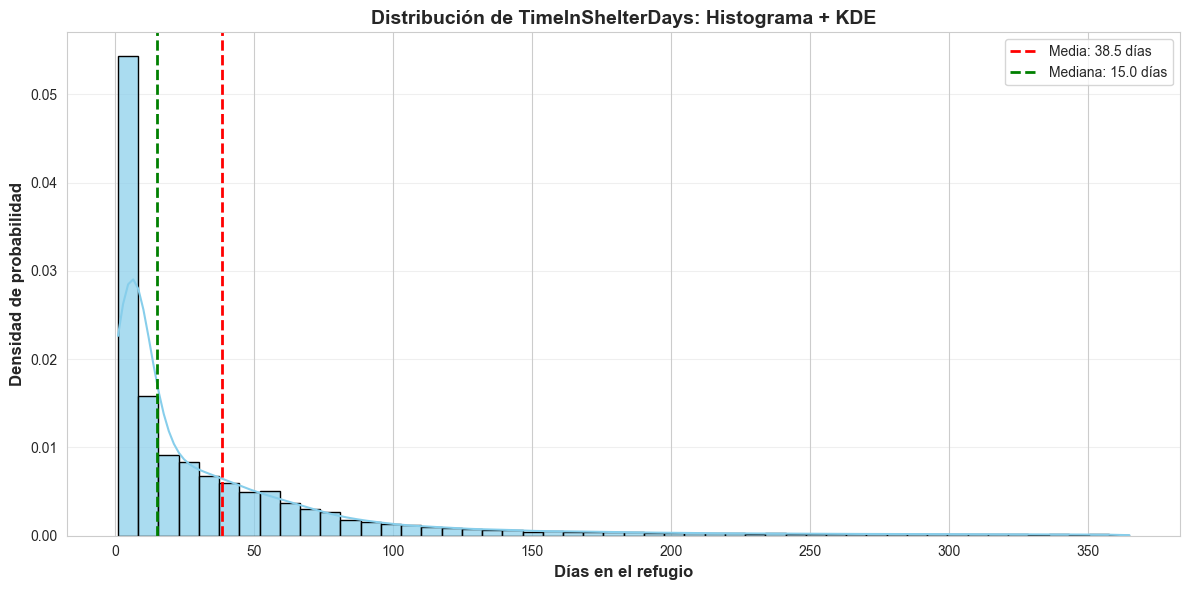

Media:    38.52 días
Mediana:  15.00 días
Diferencia (Media - Mediana): 23.52 días


In [60]:
# ============================================
# Histograma + KDE de TimeInShelterDays
# ============================================

plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='TimeInShelterDays',
    bins=50,
    kde=True,
    color='skyblue',
    edgecolor='black',
    stat='density',
    alpha=0.7
)

media = df['TimeInShelterDays'].mean()
mediana = df['TimeInShelterDays'].median()

plt.axvline(x=media, color='red', linestyle='--', linewidth=2,
            label=f'Media: {media:.1f} días')
plt.axvline(x=mediana, color='green', linestyle='--', linewidth=2,
            label=f'Mediana: {mediana:.1f} días')

plt.xlabel('Días en el refugio', fontsize=12, fontweight='bold')
plt.ylabel('Densidad de probabilidad', fontsize=12, fontweight='bold')
plt.title('Distribución de TimeInShelterDays: Histograma + KDE', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Media:    {media:.2f} días")
print(f"Mediana:  {mediana:.2f} días")
print(f"Diferencia (Media - Mediana): {media - mediana:.2f} días")

### Interpretación del Histograma + KDE

**Estadísticas clave:**
- **Media:** [COMPLETAR] días
- **Mediana:** [COMPLETAR] días
- **Diferencia:** [COMPLETAR] días

**Análisis de la distribución:**

[COMPLETAR después de ejecutar: Describir si la distribución es simétrica o sesgada, si hay cola larga hacia algún lado, etc.]

**Conclusión preliminar:**

[COMPLETAR: Indicar si se observa sesgo y si podría necesitarse transformación]

---

## 4.2 Estadísticas Descriptivas: Skewness y Kurtosis

**Objetivo:**  
Cuantificar las características de forma de la distribución mediante métricas estadísticas complementarias al análisis visual.

**Metodología:**
Se calculan las siguientes métricas para caracterizar la distribución de `TimeInShelterDays`:

- **Desviación estándar (σ):** Medida de dispersión que indica la variabilidad de los datos respecto a la media
- **Coeficiente de variación (CV):** Desviación estándar normalizada respecto a la media (expresada en porcentaje)
- **Skewness (asimetría):** Mide el grado de asimetría de la distribución
  - Skewness ≈ 0: Distribución simétrica
  - Skewness > 1: Asimetría positiva (cola larga hacia la derecha)
  - Skewness < -1: Asimetría negativa (cola larga hacia la izquierda)
- **Kurtosis (apuntamiento):** Mide el grado de concentración de valores en las colas
  - Kurtosis ≈ 0: Distribución mesocúrtica (similar a la normal)
  - Kurtosis > 0: Leptocúrtica (colas más pesadas que la normal)
  - Kurtosis < 0: Platicúrtica (colas más ligeras que la normal)

**Criterio de decisión:**
Se considera necesaria una transformación logarítmica si |Skewness| > 1.

---

In [61]:
# ============================================
# Estadísticas Descriptivas Completas
# ============================================

media = df['TimeInShelterDays'].mean()
mediana = df['TimeInShelterDays'].median()
std = df['TimeInShelterDays'].std()
skewness = skew(df['TimeInShelterDays'])
kurt = kurtosis(df['TimeInShelterDays'])
coef_variacion = (std / media) * 100

print("="*70)
print("ESTADÍSTICAS DESCRIPTIVAS DE TimeInShelterDays")
print("="*70)

print(f"\n📊 MEDIDAS DE TENDENCIA CENTRAL:")
print(f"   Media:                    {media:.2f} días")
print(f"   Mediana:                  {mediana:.2f} días")
print(f"   Diferencia (M-Med):       {media - mediana:.2f} días")

print(f"\n📊 MEDIDAS DE DISPERSIÓN:")
print(f"   Desviación estándar:      {std:.2f} días")
print(f"   Coeficiente de variación: {coef_variacion:.1f}%")

print(f"\n📊 MEDIDAS DE FORMA:")
print(f"   Skewness (asimetría):     {skewness:.3f}")
print(f"   Kurtosis (apuntamiento):  {kurt:.3f}")

print("\n" + "="*70)
print("INTERPRETACIÓN")
print("="*70)

# Interpretación de Skewness
print(f"\n🔍 ANÁLISIS DE SKEWNESS ({skewness:.3f}):")
if abs(skewness) < 0.5:
    print("   ✅ Distribución APROXIMADAMENTE SIMÉTRICA")
    print("   → No se requiere transformación logarítmica")
    
    if abs(skewness) < 0.1:
        print("   → Asimetría prácticamente nula")
    elif skewness > 0:
        print(f"   → Asimetría positiva leve")
    elif skewness < 0:
        print(f"   → Asimetría negativa leve")
    
elif 0.5 <= abs(skewness) < 1.0:
    print("   ⚠️  Distribución MODERADAMENTE SESGADA")
    print("   → Se recomienda considerar transformación logarítmica")
    
    if skewness > 0:
        print(f"   → Asimetría positiva: cola hacia valores altos")
    else:
        print(f"   → Asimetría negativa: cola hacia valores bajos")
else:
    print("   🚨 Distribución MUY SESGADA")
    print("   → Se RECOMIENDA transformación logarítmica")
    
    if skewness > 0:
        print(f"   → Asimetría positiva marcada")
    else:
        print(f"   → Asimetría negativa marcada")

# Interpretación de Kurtosis
print(f"\n🔍 ANÁLISIS DE KURTOSIS ({kurt:.3f}):")
if kurt > 1:
    print("   → Distribución LEPTOCÚRTICA (colas pesadas)")
    print("   → Mayor presencia de outliers que una distribución normal")
elif kurt < -1:
    print("   → Distribución PLATICÚRTICA (colas ligeras)")
    print("   → Menor presencia de outliers que una distribución normal")
else:
    print("   → Distribución MESOCÚRTICA (similar a la normal)")

# Interpretación de Variabilidad
print(f"\n🔍 ANÁLISIS DE VARIABILIDAD ({coef_variacion:.1f}%):")
if coef_variacion < 20:
    print("   → BAJA variabilidad: tiempos de adopción homogéneos")
elif coef_variacion < 40:
    print("   → MODERADA variabilidad: diferencias notables entre animales")
else:
    print("   → ALTA variabilidad: grandes diferencias en tiempos de adopción")
    print("   → Sugiere heterogeneidad en el dataset (diferentes subgrupos)")

print("\n" + "="*70)

ESTADÍSTICAS DESCRIPTIVAS DE TimeInShelterDays

📊 MEDIDAS DE TENDENCIA CENTRAL:
   Media:                    38.52 días
   Mediana:                  15.00 días
   Diferencia (M-Med):       23.52 días

📊 MEDIDAS DE DISPERSIÓN:
   Desviación estándar:      57.18 días
   Coeficiente de variación: 148.4%

📊 MEDIDAS DE FORMA:
   Skewness (asimetría):     2.827
   Kurtosis (apuntamiento):  9.163

INTERPRETACIÓN

🔍 ANÁLISIS DE SKEWNESS (2.827):
   🚨 Distribución MUY SESGADA
   → Se RECOMIENDA transformación logarítmica
   → Asimetría positiva marcada

🔍 ANÁLISIS DE KURTOSIS (9.163):
   → Distribución LEPTOCÚRTICA (colas pesadas)
   → Mayor presencia de outliers que una distribución normal

🔍 ANÁLISIS DE VARIABILIDAD (148.4%):
   → ALTA variabilidad: grandes diferencias en tiempos de adopción
   → Sugiere heterogeneidad en el dataset (diferentes subgrupos)



### Interpretación de Estadísticas Descriptivas

**Resultados obtenidos:**

| Métrica | Valor | Interpretación |
|---------|-------|----------------|
| **Media** | [COMPLETAR] días | Tiempo promedio de permanencia |
| **Mediana** | [COMPLETAR] días | Valor central |
| **Diferencia (Media-Mediana)** | [COMPLETAR] días | [COMPLETAR] |
| **Desviación estándar** | [COMPLETAR] días | [COMPLETAR] |
| **Coeficiente de variación** | [COMPLETAR]% | [COMPLETAR] |
| **Skewness** | [COMPLETAR] | [COMPLETAR] |
| **Kurtosis** | [COMPLETAR] | [COMPLETAR] |

[COMPLETAR con interpretaciones detalladas después de ejecutar]

---

## 4.3 Detección de Outliers: Boxplot

**Objetivo:**  
Identificar valores atípicos (outliers) mediante el método del rango intercuartílico (IQR) y evaluar su impacto potencial en el modelado predictivo.

**Metodología:**

Se utiliza un diagrama de caja y bigotes (boxplot) para visualizar la distribución de `TimeInShelterDays` y detectar valores atípicos mediante el criterio estadístico IQR:

- **Q1 (Percentil 25):** 25% de los datos están por debajo de este valor
- **Q2 (Mediana):** 50% de los datos están por debajo de este valor
- **Q3 (Percentil 75):** 75% de los datos están por debajo de este valor
- **IQR (Rango Intercuartílico):** Q3 - Q1 (contiene el 50% central de los datos)

**Criterio de detección de outliers:**
- **Outliers moderados:** Valores fuera del rango [Q1 - 1.5×IQR, Q3 + 1.5×IQR]
- **Outliers extremos:** Valores fuera del rango [Q1 - 3×IQR, Q3 + 3×IQR]

**Elementos del boxplot:**
- **Caja:** Contiene el 50% central de los datos (entre Q1 y Q3)
- **Línea central:** Mediana (Q2)
- **Bigotes:** Extensión hasta 1.5×IQR desde los bordes de la caja
- **Puntos individuales:** Outliers que caen fuera de los bigotes

---

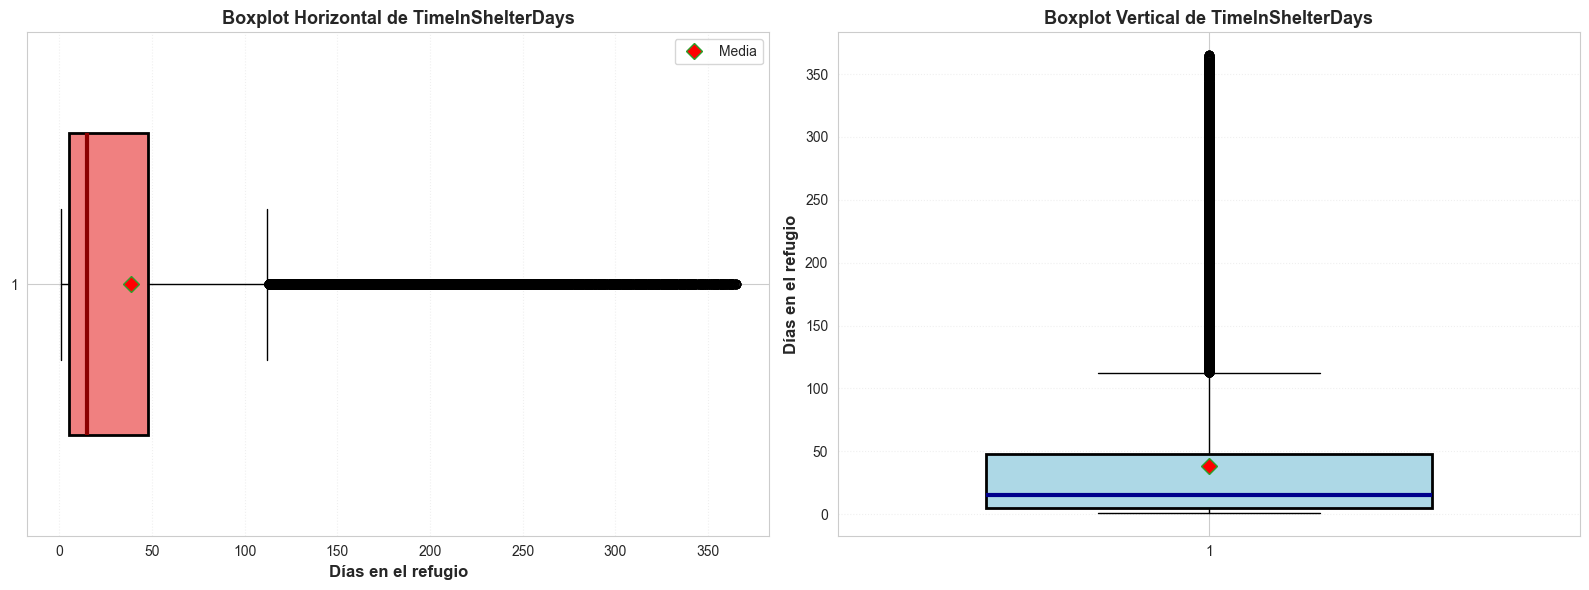

ANÁLISIS DE OUTLIERS - MÉTODO IQR

📊 CUARTILES:
   Q1 (Percentil 25):  5.00 días
   Q2 (Mediana):       15.00 días
   Q3 (Percentil 75):  48.00 días
   IQR (Q3 - Q1):      43.00 días

📏 LÍMITES PARA OUTLIERS MODERADOS:
   Límite inferior:    -59.50 días
   Límite superior:    112.50 días

🔍 RESULTADOS:
   Outliers totales:   4967 (8.29% del dataset)
   Outliers bajos:     0 (< -59.50 días)
   Outliers altos:     4967 (> 112.50 días)

📊 RANGO DE VALORES:
   Valor mínimo:       1 días
   Valor máximo:       365 días



In [62]:
# ============================================
# Boxplot y Detección de Outliers
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot Horizontal
box1 = axes[0].boxplot(
    df['TimeInShelterDays'], 
    vert=False,
    patch_artist=True,
    widths=0.6,
    showmeans=True,
    meanprops=dict(marker='D', markerfacecolor='red', markersize=8)
)

box1['boxes'][0].set_facecolor('lightcoral')
box1['boxes'][0].set_edgecolor('black')
box1['boxes'][0].set_linewidth(2)
box1['medians'][0].set_color('darkred')
box1['medians'][0].set_linewidth(3)

axes[0].set_xlabel('Días en el refugio', fontsize=12, fontweight='bold')
axes[0].set_title('Boxplot Horizontal de TimeInShelterDays', 
                   fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3, linestyle=':')
axes[0].legend([box1['means'][0]], ['Media'], loc='upper right')

# Boxplot Vertical
box2 = axes[1].boxplot(
    df['TimeInShelterDays'], 
    vert=True,
    patch_artist=True,
    widths=0.6,
    showmeans=True,
    meanprops=dict(marker='D', markerfacecolor='red', markersize=8)
)

box2['boxes'][0].set_facecolor('lightblue')
box2['boxes'][0].set_edgecolor('black')
box2['boxes'][0].set_linewidth(2)
box2['medians'][0].set_color('darkblue')
box2['medians'][0].set_linewidth(3)

axes[1].set_ylabel('Días en el refugio', fontsize=12, fontweight='bold')
axes[1].set_title('Boxplot Vertical de TimeInShelterDays', 
                   fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

# Cálculo de Outliers
Q1 = df['TimeInShelterDays'].quantile(0.25)
Q2 = df['TimeInShelterDays'].quantile(0.50)
Q3 = df['TimeInShelterDays'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_bajos = df[df['TimeInShelterDays'] < limite_inferior]
outliers_altos = df[df['TimeInShelterDays'] > limite_superior]
outliers_totales = len(outliers_bajos) + len(outliers_altos)

print("="*70)
print("ANÁLISIS DE OUTLIERS - MÉTODO IQR")
print("="*70)

print(f"\n📊 CUARTILES:")
print(f"   Q1 (Percentil 25):  {Q1:.2f} días")
print(f"   Q2 (Mediana):       {Q2:.2f} días")
print(f"   Q3 (Percentil 75):  {Q3:.2f} días")
print(f"   IQR (Q3 - Q1):      {IQR:.2f} días")

print(f"\n📏 LÍMITES PARA OUTLIERS MODERADOS:")
print(f"   Límite inferior:    {limite_inferior:.2f} días")
print(f"   Límite superior:    {limite_superior:.2f} días")

print(f"\n🔍 RESULTADOS:")
print(f"   Outliers totales:   {outliers_totales} ({outliers_totales/len(df)*100:.2f}% del dataset)")
print(f"   Outliers bajos:     {len(outliers_bajos)} (< {limite_inferior:.2f} días)")
print(f"   Outliers altos:     {len(outliers_altos)} (> {limite_superior:.2f} días)")

print(f"\n📊 RANGO DE VALORES:")
print(f"   Valor mínimo:       {df['TimeInShelterDays'].min():.0f} días")
print(f"   Valor máximo:       {df['TimeInShelterDays'].max():.0f} días")

print("\n" + "="*70)

### Interpretación del Boxplot

**Cuartiles obtenidos:**

| Estadístico | Valor | Descripción |
|-------------|-------|-------------|
| **Q1 (Percentil 25)** | [COMPLETAR] días | 25% de animales se adoptan en [X] días o menos |
| **Q2 (Mediana)** | [COMPLETAR] días | 50% de animales se adoptan en [X] días o menos |
| **Q3 (Percentil 75)** | [COMPLETAR] días | 75% de animales se adoptan en [X] días o menos |
| **IQR** | [COMPLETAR] días | Rango que contiene el 50% central de los datos |

**Análisis de Outliers:**

[COMPLETAR con análisis de outliers después de ejecutar]

---

## 4.4 Prueba de Normalidad: Q-Q Plot

**Objetivo:**  
Evaluar mediante análisis visual y estadístico si la distribución de `TimeInShelterDays` se aproxima a una distribución normal, confirmando las conclusiones preliminares sobre la necesidad de transformación logarítmica.

**Metodología:**

El Q-Q plot (Quantile-Quantile plot) es una herramienta gráfica que compara los cuantiles de los datos observados con los cuantiles teóricos de una distribución normal estándar.

**Interpretación del Q-Q plot:**
- **Puntos alineados sobre la línea diagonal:** Los datos siguen una distribución normal
- **Puntos que se curvan hacia arriba en los extremos:** Distribución con colas más pesadas que la normal (asimetría positiva)
- **Puntos que se curvan hacia abajo en los extremos:** Distribución con colas más ligeras que la normal (asimetría negativa)
- **Patrón en forma de S:** Distribución con asimetría marcada

**Criterio de decisión:**

Una distribución se considera suficientemente normal para modelado de regresión si:
1. La mayoría de los puntos (>95%) se encuentran cerca de la línea diagonal
2. No hay desviaciones sistemáticas pronunciadas en los extremos
3. El skewness está dentro del rango [-0.5, 0.5]

---

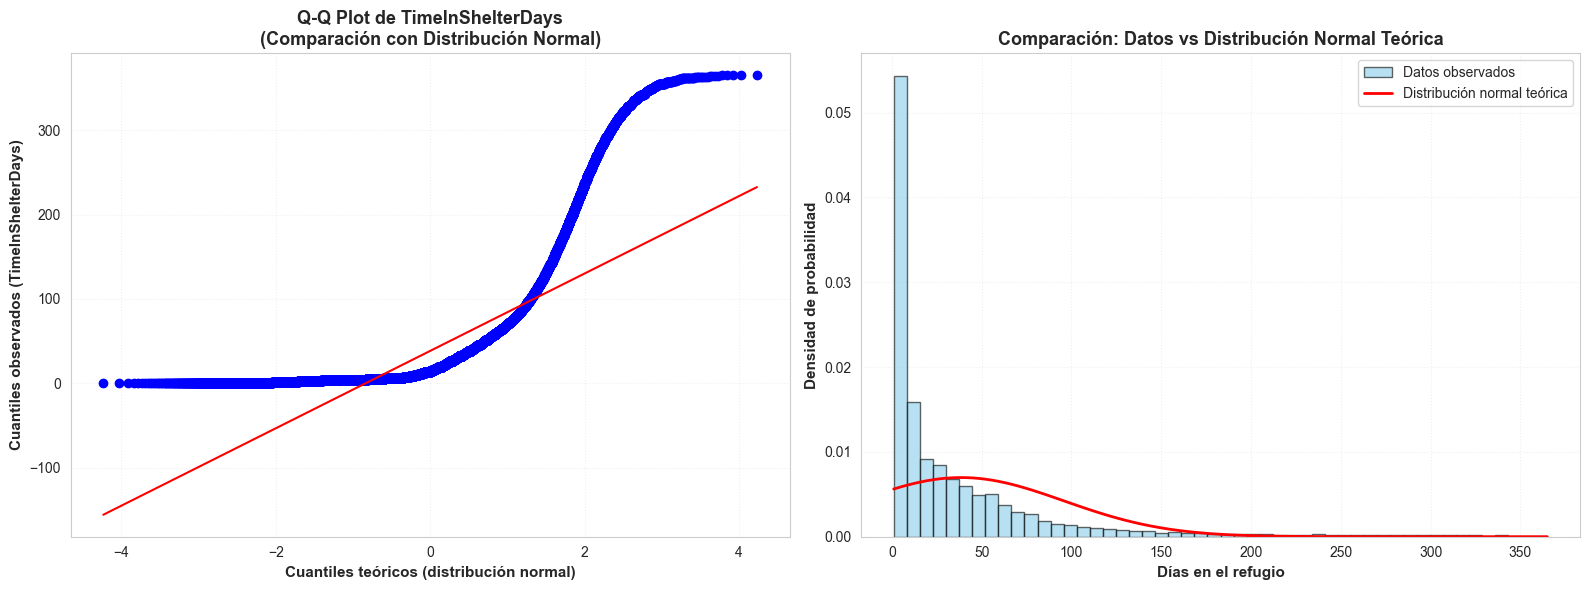

ANÁLISIS DE NORMALIDAD

⚠️  Dataset muy grande (n=59,919)
   Test de Shapiro-Wilk no se ejecuta (solo válido para n<5000)
   Se recomienda usar solo análisis visual (Q-Q plot) y skewness

📊 RESUMEN DE MÉTRICAS DE FORMA:
   Skewness:  2.827
   Kurtosis:  9.163



In [63]:
# ============================================
# Q-Q Plot
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Q-Q Plot
stats.probplot(df['TimeInShelterDays'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot de TimeInShelterDays\n(Comparación con Distribución Normal)', 
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Cuantiles teóricos (distribución normal)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Cuantiles observados (TimeInShelterDays)', fontsize=11, fontweight='bold')
axes[0].grid(alpha=0.3, linestyle=':')

# Histograma + Curva Normal Teórica
axes[1].hist(df['TimeInShelterDays'], bins=50, density=True, 
             alpha=0.6, color='skyblue', edgecolor='black', label='Datos observados')

mu = df['TimeInShelterDays'].mean()
sigma = df['TimeInShelterDays'].std()
x = np.linspace(df['TimeInShelterDays'].min(), df['TimeInShelterDays'].max(), 100)
normal_curve = stats.norm.pdf(x, mu, sigma)
axes[1].plot(x, normal_curve, 'r-', linewidth=2, label='Distribución normal teórica')

axes[1].set_xlabel('Días en el refugio', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Densidad de probabilidad', fontsize=11, fontweight='bold')
axes[1].set_title('Comparación: Datos vs Distribución Normal Teórica', 
                  fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

# Test de Shapiro-Wilk (solo si dataset < 5000)
print("="*70)
print("ANÁLISIS DE NORMALIDAD")
print("="*70)

if len(df) < 5000:
    from scipy.stats import shapiro
    stat, p_value = shapiro(df['TimeInShelterDays'])
    
    print(f"\n📊 TEST DE SHAPIRO-WILK:")
    print(f"   Estadístico W: {stat:.4f}")
    print(f"   p-value:       {p_value:.4f}")
    
    if p_value > 0.05:
        print(f"   ✅ p-value > 0.05: NO se rechaza normalidad")
    else:
        print(f"   ❌ p-value < 0.05: Se RECHAZA normalidad")
else:
    print(f"\n⚠️  Dataset muy grande (n={len(df):,})")
    print(f"   Test de Shapiro-Wilk no se ejecuta (solo válido para n<5000)")
    print(f"   Se recomienda usar solo análisis visual (Q-Q plot) y skewness")

# Resumen de métricas
skewness_val = skew(df['TimeInShelterDays'])
kurtosis_val = kurtosis(df['TimeInShelterDays'])

print(f"\n📊 RESUMEN DE MÉTRICAS DE FORMA:")
print(f"   Skewness:  {skewness_val:.3f}")
print(f"   Kurtosis:  {kurtosis_val:.3f}")

print("\n" + "="*70)

### Interpretación del Q-Q Plot y Conclusiones Finales

[COMPLETAR después de ejecutar con análisis del Q-Q plot y decisión final sobre transformación logarítmica]

---

## 🎯 CONCLUSIÓN FINAL: Decisión sobre Transformación Logarítmica

**Síntesis de todos los análisis realizados:**

| Análisis | Resultado | ¿Requiere transformación? |
|----------|-----------|---------------------------|
| **Histograma + KDE** | [COMPLETAR] | [COMPLETAR] |
| **Skewness** | [COMPLETAR] | [COMPLETAR] |
| **Kurtosis** | [COMPLETAR] | [COMPLETAR] |
| **Diferencia Media-Mediana** | [COMPLETAR] | [COMPLETAR] |
| **Outliers (Boxplot)** | [COMPLETAR]% | [COMPLETAR] |
| **Q-Q Plot** | [COMPLETAR] | [COMPLETAR] |
| **Test Shapiro-Wilk** | [COMPLETAR] | [COMPLETAR] |

---

**DECISIÓN FINAL:**

[COMPLETAR con decisión fundamentada después de ejecutar todos los análisis]

---

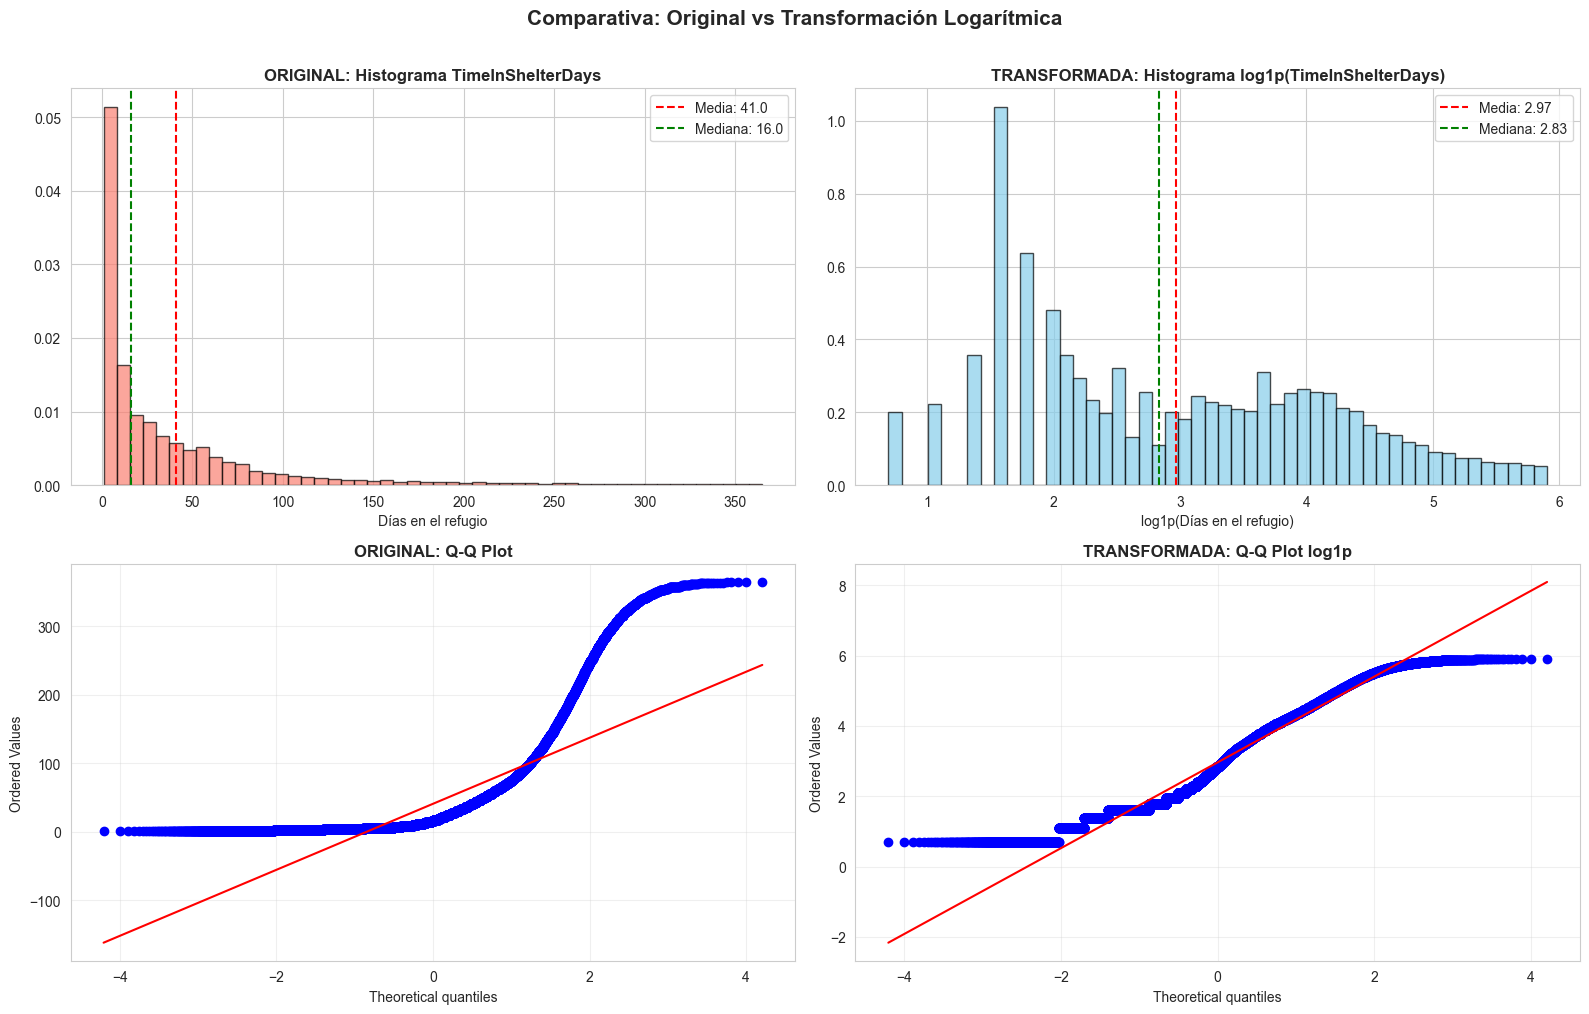

COMPARATIVA DE MÉTRICAS: ORIGINAL vs LOG1P
          Original  log1p
Media       40.963  2.965
Mediana     16.000  2.833
Std         59.522  1.244
Skewness     2.685  0.298
Kurtosis     8.102 -0.899

✅ Reducción de skewness: 2.685 → 0.298

💾 Dataset guardado con la nueva columna 'TimeInShelterDays_log'


In [64]:
# ============================================
# TRANSFORMACIÓN LOGARÍTMICA: log1p
# ============================================
# Usamos log1p (log(x+1)) porque es más segura si hubiera algún cero

import numpy as np

# Aplicar sobre el dataset ya limpio
df_clean['TimeInShelterDays_log'] = np.log1p(df_clean['TimeInShelterDays'])

# Comparativa antes/después
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# --- Original ---
axes[0, 0].hist(df_clean['TimeInShelterDays'], bins=50, color='salmon',
                edgecolor='black', alpha=0.7, density=True)
axes[0, 0].axvline(df_clean['TimeInShelterDays'].mean(), color='red', 
                   linestyle='--', label=f"Media: {df_clean['TimeInShelterDays'].mean():.1f}")
axes[0, 0].axvline(df_clean['TimeInShelterDays'].median(), color='green', 
                   linestyle='--', label=f"Mediana: {df_clean['TimeInShelterDays'].median():.1f}")
axes[0, 0].set_title('ORIGINAL: Histograma TimeInShelterDays', fontweight='bold')
axes[0, 0].set_xlabel('Días en el refugio')
axes[0, 0].legend()

# --- Log ---
axes[0, 1].hist(df_clean['TimeInShelterDays_log'], bins=50, color='skyblue',
                edgecolor='black', alpha=0.7, density=True)
axes[0, 1].axvline(df_clean['TimeInShelterDays_log'].mean(), color='red', 
                   linestyle='--', label=f"Media: {df_clean['TimeInShelterDays_log'].mean():.2f}")
axes[0, 1].axvline(df_clean['TimeInShelterDays_log'].median(), color='green', 
                   linestyle='--', label=f"Mediana: {df_clean['TimeInShelterDays_log'].median():.2f}")
axes[0, 1].set_title('TRANSFORMADA: Histograma log1p(TimeInShelterDays)', fontweight='bold')
axes[0, 1].set_xlabel('log1p(Días en el refugio)')
axes[0, 1].legend()

# --- Q-Q Original ---
stats.probplot(df_clean['TimeInShelterDays'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('ORIGINAL: Q-Q Plot', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# --- Q-Q Log ---
stats.probplot(df_clean['TimeInShelterDays_log'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('TRANSFORMADA: Q-Q Plot log1p', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Comparativa: Original vs Transformación Logarítmica', 
             fontsize=15, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

# Métricas comparativas
from scipy.stats import skew, kurtosis

print("="*70)
print("COMPARATIVA DE MÉTRICAS: ORIGINAL vs LOG1P")
print("="*70)

metricas = {
    'Media':     [df_clean['TimeInShelterDays'].mean(),     df_clean['TimeInShelterDays_log'].mean()],
    'Mediana':   [df_clean['TimeInShelterDays'].median(),   df_clean['TimeInShelterDays_log'].median()],
    'Std':       [df_clean['TimeInShelterDays'].std(),      df_clean['TimeInShelterDays_log'].std()],
    'Skewness':  [skew(df_clean['TimeInShelterDays']),      skew(df_clean['TimeInShelterDays_log'])],
    'Kurtosis':  [kurtosis(df_clean['TimeInShelterDays']),  kurtosis(df_clean['TimeInShelterDays_log'])],
}

df_metricas = pd.DataFrame(metricas, index=['Original', 'log1p']).T
print(df_metricas.round(3))

print(f"\n✅ Reducción de skewness: {skew(df_clean['TimeInShelterDays']):.3f} → {skew(df_clean['TimeInShelterDays_log']):.3f}")

# Guardar dataset actualizado
df_clean.to_csv('../data/pet_adoption_clean.csv', index=False)
print(f"\n💾 Dataset guardado con la nueva columna 'TimeInShelterDays_log'")


```

---

## 🗺️ ROADMAP: Próximos pasos

Una vez termines esto, el flujo natural del proyecto es:
```
📁 EDA (estás aquí)
│
├── ✅ 1.1 Carga del dataset
├── ✅ 1.2 Calidad de datos (nulos, duplicados)
├── ✅ 4.1 Distribución variable objetivo
├── ✅ 4.2 Estadísticas descriptivas
├── ✅ 4.3 Outliers (boxplot)
├── ✅ 4.4 Normalidad (Q-Q plot)
├── 🔄 4.5 Transformación logarítmica  ← AQUÍ ESTÁS
│
├── ⏭️  5. EDA de variables predictoras (univariante)
│         └── Categóricas: barplots de AnimalType, Breed, Sex, IntakeType, IntakeCondition
│         └── Numéricas: histogramas de AgeInDays
│
├── ⏭️  6. Análisis bivariante
│         └── ¿Qué variables se correlacionan más con TimeInShelterDays_log?
│         └── Boxplots: TimeInShelterDays por cada categórica
│         └── Scatterplot: AgeInDays vs TimeInShelterDays
│
├── ⏭️  7. Feature Engineering (notebook separado)
│         └── Encoding de categóricas (One-Hot, Target Encoding)
│         └── Agrupación de Breed (hay muchas categorías)
│         └── Binning de AgeInDays (cachorro / joven / adulto / senior)
│         └── Crear nuevas variables si tiene sentido
│
├── ⏭️  8. Preprocesado final
│         └── Train/test split
│         └── Escalado de numéricas (StandardScaler o MinMaxScaler)
│         └── Pipeline de transformaciones
│
└── ⏭️  9. Modelado
          └── Baseline (DummyRegressor)
          └── Modelos lineales (Ridge, Lasso)
          └── Árboles (Random Forest, XGBoost)
          └── Evaluación: RMSE, MAE, R² (¡sobre escala original, aplicando expm1!)
          └── Interpretabilidad (SHAP values)

In [65]:
print(f"Número de razas únicas: {df_clean['Breed'].nunique()}")
print("\nTop 20 razas más frecuentes:")
print(df_clean['Breed'].value_counts().head(20))
print("\nRazas con menos de 10 registros:")
print((df_clean['Breed'].value_counts() < 10).sum())

Número de razas únicas: 1884

Top 20 razas más frecuentes:
Breed
Domestic Shorthair Mix       10814
Pit Bull Mix                  3631
Labrador Retriever Mix        3266
Domestic Shorthair            3027
Chihuahua Shorthair Mix       2682
German Shepherd Mix           1636
Domestic Medium Hair Mix      1397
Australian Cattle Dog Mix      908
Domestic Longhair Mix          741
Siamese Mix                    583
Pit Bull                       574
Border Collie Mix              530
Dachshund Mix                  525
Boxer Mix                      518
Labrador Retriever             506
German Shepherd                493
Chihuahua Shorthair            452
Staffordshire Mix              441
Catahoula Mix                  432
Domestic Medium Hair           429
Name: count, dtype: int64

Razas con menos de 10 registros:
1525


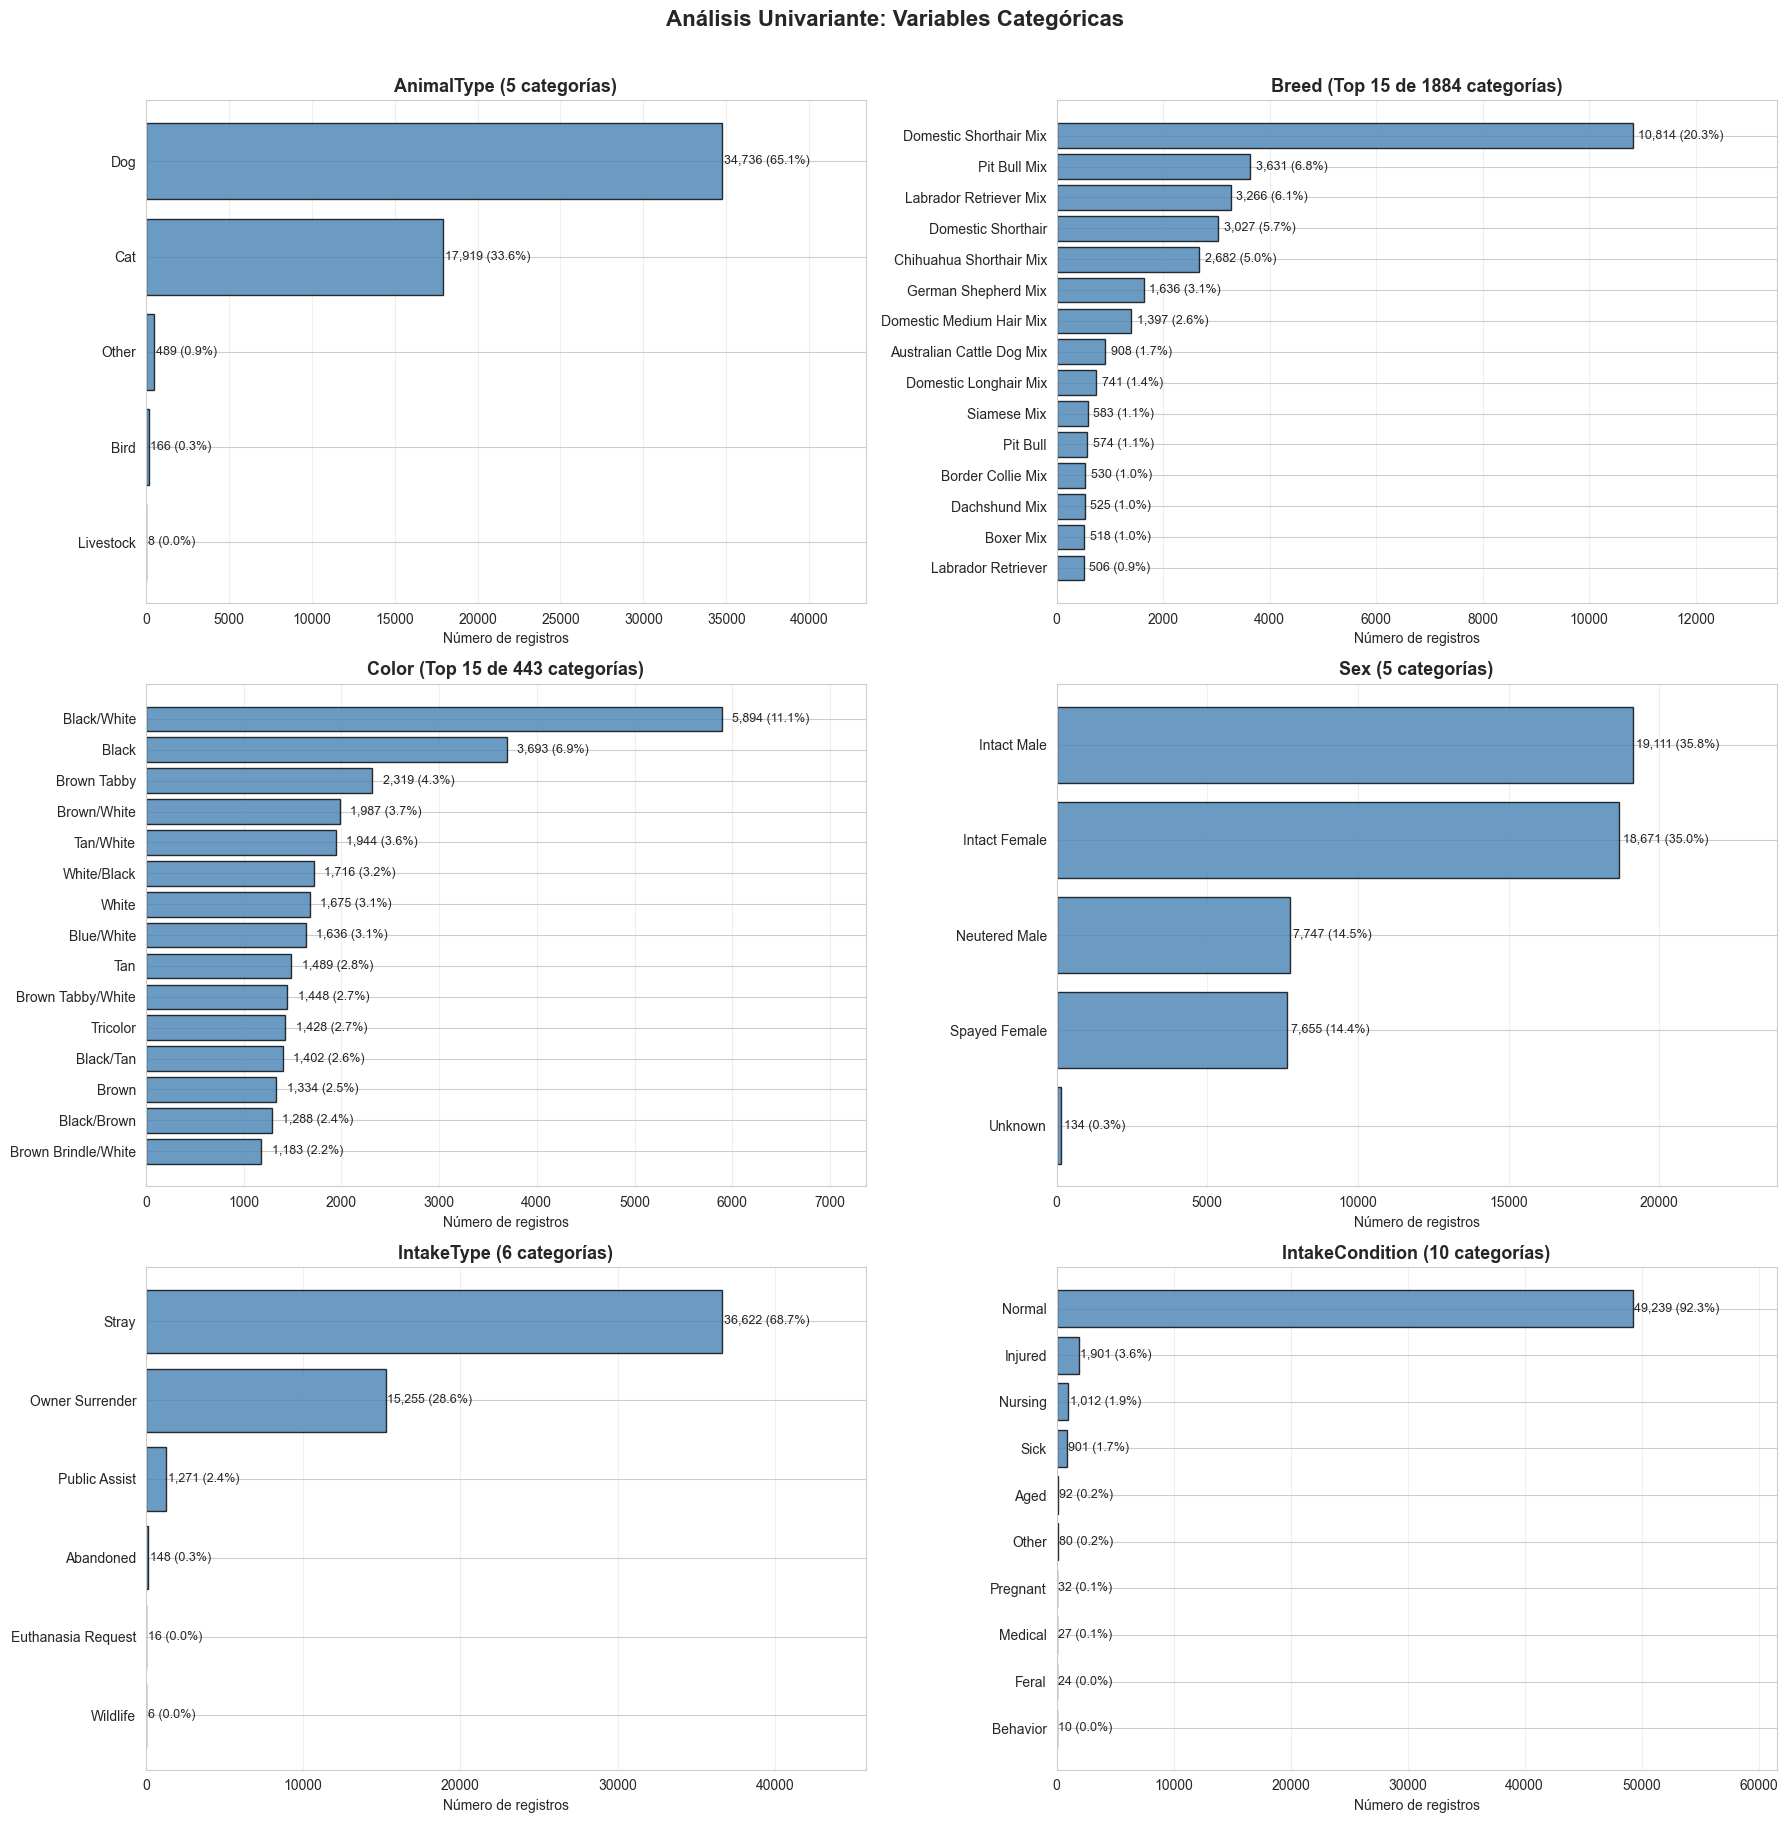

RESUMEN ESTADÍSTICO: VARIABLES CATEGÓRICAS

📊 AnimalType:
   Categorías únicas: 5
   Categoría más frecuente: Dog (65.1%)
   Categoría menos frecuente: Livestock (0.02%)

📊 Breed:
   Categorías únicas: 1884
   Categoría más frecuente: Domestic Shorthair Mix (20.3%)
   Categoría menos frecuente: Chow Chow/Border Collie (0.00%)

📊 Color:
   Categorías únicas: 443
   Categoría más frecuente: Black/White (11.1%)
   Categoría menos frecuente: Brown Brindle/Black Brindle (0.00%)

📊 Sex:
   Categorías únicas: 5
   Categoría más frecuente: Intact Male (35.8%)
   Categoría menos frecuente: Unknown (0.25%)

📊 IntakeType:
   Categorías únicas: 6
   Categoría más frecuente: Stray (68.7%)
   Categoría menos frecuente: Wildlife (0.01%)

📊 IntakeCondition:
   Categorías únicas: 10
   Categoría más frecuente: Normal (92.3%)
   Categoría menos frecuente: Behavior (0.02%)


In [66]:
# ============================================
# UNIVARIANTE: VARIABLES CATEGÓRICAS
# ============================================

categorical_cols = ['AnimalType', 'Breed', 'Color', 'Sex', 'IntakeType', 'IntakeCondition']

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    conteo = df_clean[col].value_counts()
    
    # Si hay muchas categorías, mostrar solo top 15
    if len(conteo) > 15:
        conteo = conteo.head(15)
        titulo = f'{col} (Top 15 de {df_clean[col].nunique()} categorías)'
    else:
        titulo = f'{col} ({df_clean[col].nunique()} categorías)'
    
    bars = axes[i].barh(conteo.index[::-1], conteo.values[::-1], 
                         color='steelblue', edgecolor='black', alpha=0.8)
    
    # Añadir porcentaje en cada barra
    total = len(df_clean)
    for bar, val in zip(bars, conteo.values[::-1]):
        axes[i].text(bar.get_width() + total*0.002, bar.get_y() + bar.get_height()/2,
                    f'{val:,} ({val/total*100:.1f}%)', va='center', fontsize=9)
    
    axes[i].set_title(titulo, fontsize=13, fontweight='bold')
    axes[i].set_xlabel('Número de registros', fontsize=10)
    axes[i].grid(axis='x', alpha=0.3)
    axes[i].set_xlim(0, conteo.values.max() * 1.25)

plt.suptitle('Análisis Univariante: Variables Categóricas', 
             fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

# Estadísticas de cada categórica
print("="*70)
print("RESUMEN ESTADÍSTICO: VARIABLES CATEGÓRICAS")
print("="*70)
for col in categorical_cols:
    print(f"\n📊 {col}:")
    print(f"   Categorías únicas: {df_clean[col].nunique()}")
    print(f"   Categoría más frecuente: {df_clean[col].mode()[0]} "
          f"({df_clean[col].value_counts().iloc[0]/len(df_clean)*100:.1f}%)")
    print(f"   Categoría menos frecuente: {df_clean[col].value_counts().index[-1]} "
          f"({df_clean[col].value_counts().iloc[-1]/len(df_clean)*100:.2f}%)")

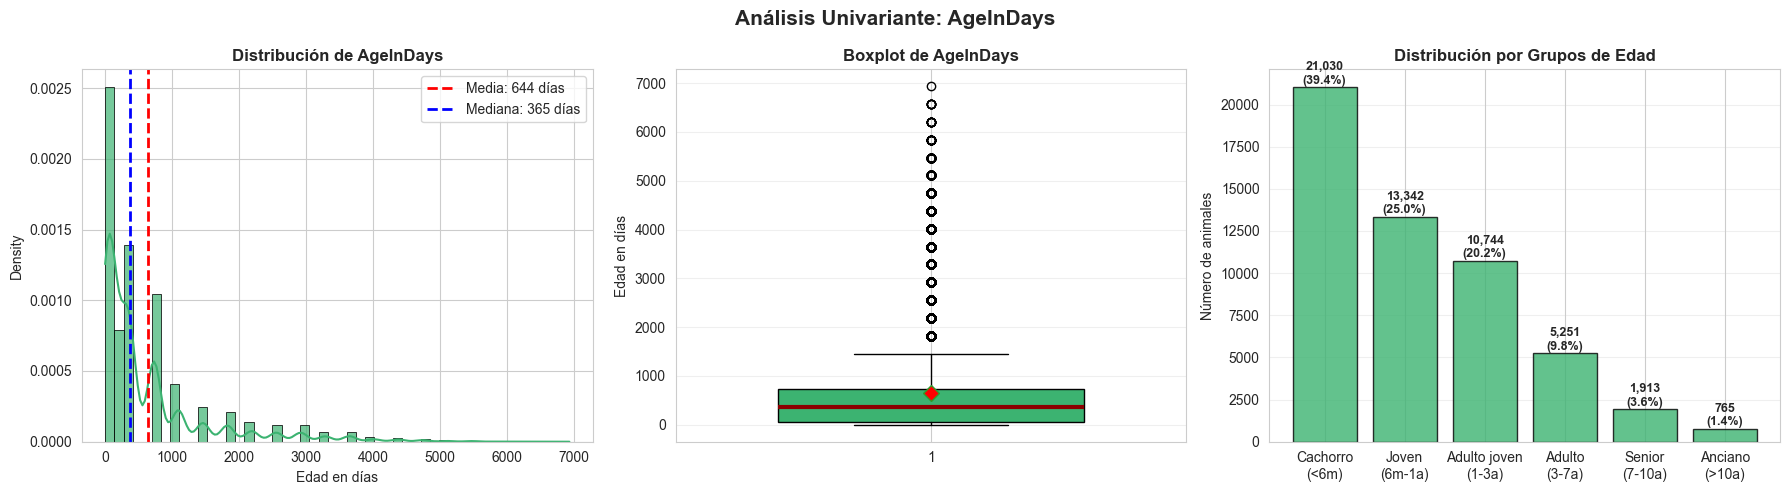

ESTADÍSTICAS DESCRIPTIVAS: AgeInDays

   Media:    644 días (1.8 años)
   Mediana:  365 días (1.0 años)
   Mínimo:   0 días
   Máximo:   6935 días (19 años)
   Skewness: 2.382

📊 Distribución por grupos de edad:
   Cachorro (<6m)            21,030 (39.4%)
   Joven (6m-1a)             13,342 (25.0%)
   Adulto joven (1-3a)       10,744 (20.2%)
   Adulto (3-7a)             5,251 (9.8%)
   Senior (7-10a)            1,913 (3.6%)
   Anciano (>10a)            765 (1.4%)


In [67]:
# ============================================
# UNIVARIANTE: AgeInDays
# ============================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma + KDE
sns.histplot(data=df_clean, x='AgeInDays', bins=50, kde=True,
             color='mediumseagreen', edgecolor='black', stat='density',
             alpha=0.7, ax=axes[0])
axes[0].axvline(df_clean['AgeInDays'].mean(), color='red', linestyle='--', linewidth=2,
                label=f"Media: {df_clean['AgeInDays'].mean():.0f} días")
axes[0].axvline(df_clean['AgeInDays'].median(), color='blue', linestyle='--', linewidth=2,
                label=f"Mediana: {df_clean['AgeInDays'].median():.0f} días")
axes[0].set_title('Distribución de AgeInDays', fontweight='bold')
axes[0].set_xlabel('Edad en días')
axes[0].legend()

# Boxplot
axes[1].boxplot(df_clean['AgeInDays'], vert=True, patch_artist=True,
                widths=0.6,
                boxprops=dict(facecolor='mediumseagreen', color='black'),
                medianprops=dict(color='darkred', linewidth=3),
                showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
axes[1].set_title('Boxplot de AgeInDays', fontweight='bold')
axes[1].set_ylabel('Edad en días')
axes[1].grid(axis='y', alpha=0.3)

# Transformar a años para interpretación
df_clean['AgeInYears'] = df_clean['AgeInDays'] / 365

bins_edad = [0, 0.5, 1, 3, 7, 10, 100]
labels_edad = ['Cachorro\n(<6m)', 'Joven\n(6m-1a)', 'Adulto joven\n(1-3a)', 
               'Adulto\n(3-7a)', 'Senior\n(7-10a)', 'Anciano\n(>10a)']
df_clean['AgeGroup'] = pd.cut(df_clean['AgeInYears'], bins=bins_edad, labels=labels_edad)

conteo_edad = df_clean['AgeGroup'].value_counts().reindex(labels_edad)
axes[2].bar(labels_edad, conteo_edad.values, color='mediumseagreen', 
            edgecolor='black', alpha=0.8)
for j, (label, val) in enumerate(zip(labels_edad, conteo_edad.values)):
    axes[2].text(j, val + 200, f'{val:,}\n({val/len(df_clean)*100:.1f}%)', 
                ha='center', fontsize=9, fontweight='bold')
axes[2].set_title('Distribución por Grupos de Edad', fontweight='bold')
axes[2].set_ylabel('Número de animales')
axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('Análisis Univariante: AgeInDays', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

# Estadísticas
print("="*70)
print("ESTADÍSTICAS DESCRIPTIVAS: AgeInDays")
print("="*70)
print(f"\n   Media:    {df_clean['AgeInDays'].mean():.0f} días "
      f"({df_clean['AgeInDays'].mean()/365:.1f} años)")
print(f"   Mediana:  {df_clean['AgeInDays'].median():.0f} días "
      f"({df_clean['AgeInDays'].median()/365:.1f} años)")
print(f"   Mínimo:   {df_clean['AgeInDays'].min():.0f} días")
print(f"   Máximo:   {df_clean['AgeInDays'].max():.0f} días "
      f"({df_clean['AgeInDays'].max()/365:.0f} años)")
print(f"   Skewness: {skew(df_clean['AgeInDays']):.3f}")
print(f"\n📊 Distribución por grupos de edad:")
for label in labels_edad:
    n = conteo_edad[label]
    print(f"   {label.replace(chr(10), ' '):25s} {n:,} ({n/len(df_clean)*100:.1f}%)")

C:\Users\zulay\AppData\Local\Temp\ipykernel_12624\3000058482.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_plot, labels=orden, patch_artist=True,
C:\Users\zulay\AppData\Local\Temp\ipykernel_12624\3000058482.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_plot, labels=orden, patch_artist=True,
C:\Users\zulay\AppData\Local\Temp\ipykernel_12624\3000058482.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_plot, labels=orden, patch_artist=True,
C:\Users\zulay\AppData\Local\Temp\ipykernel_12624\3000058482.py:17: MatplotlibDeprecatio

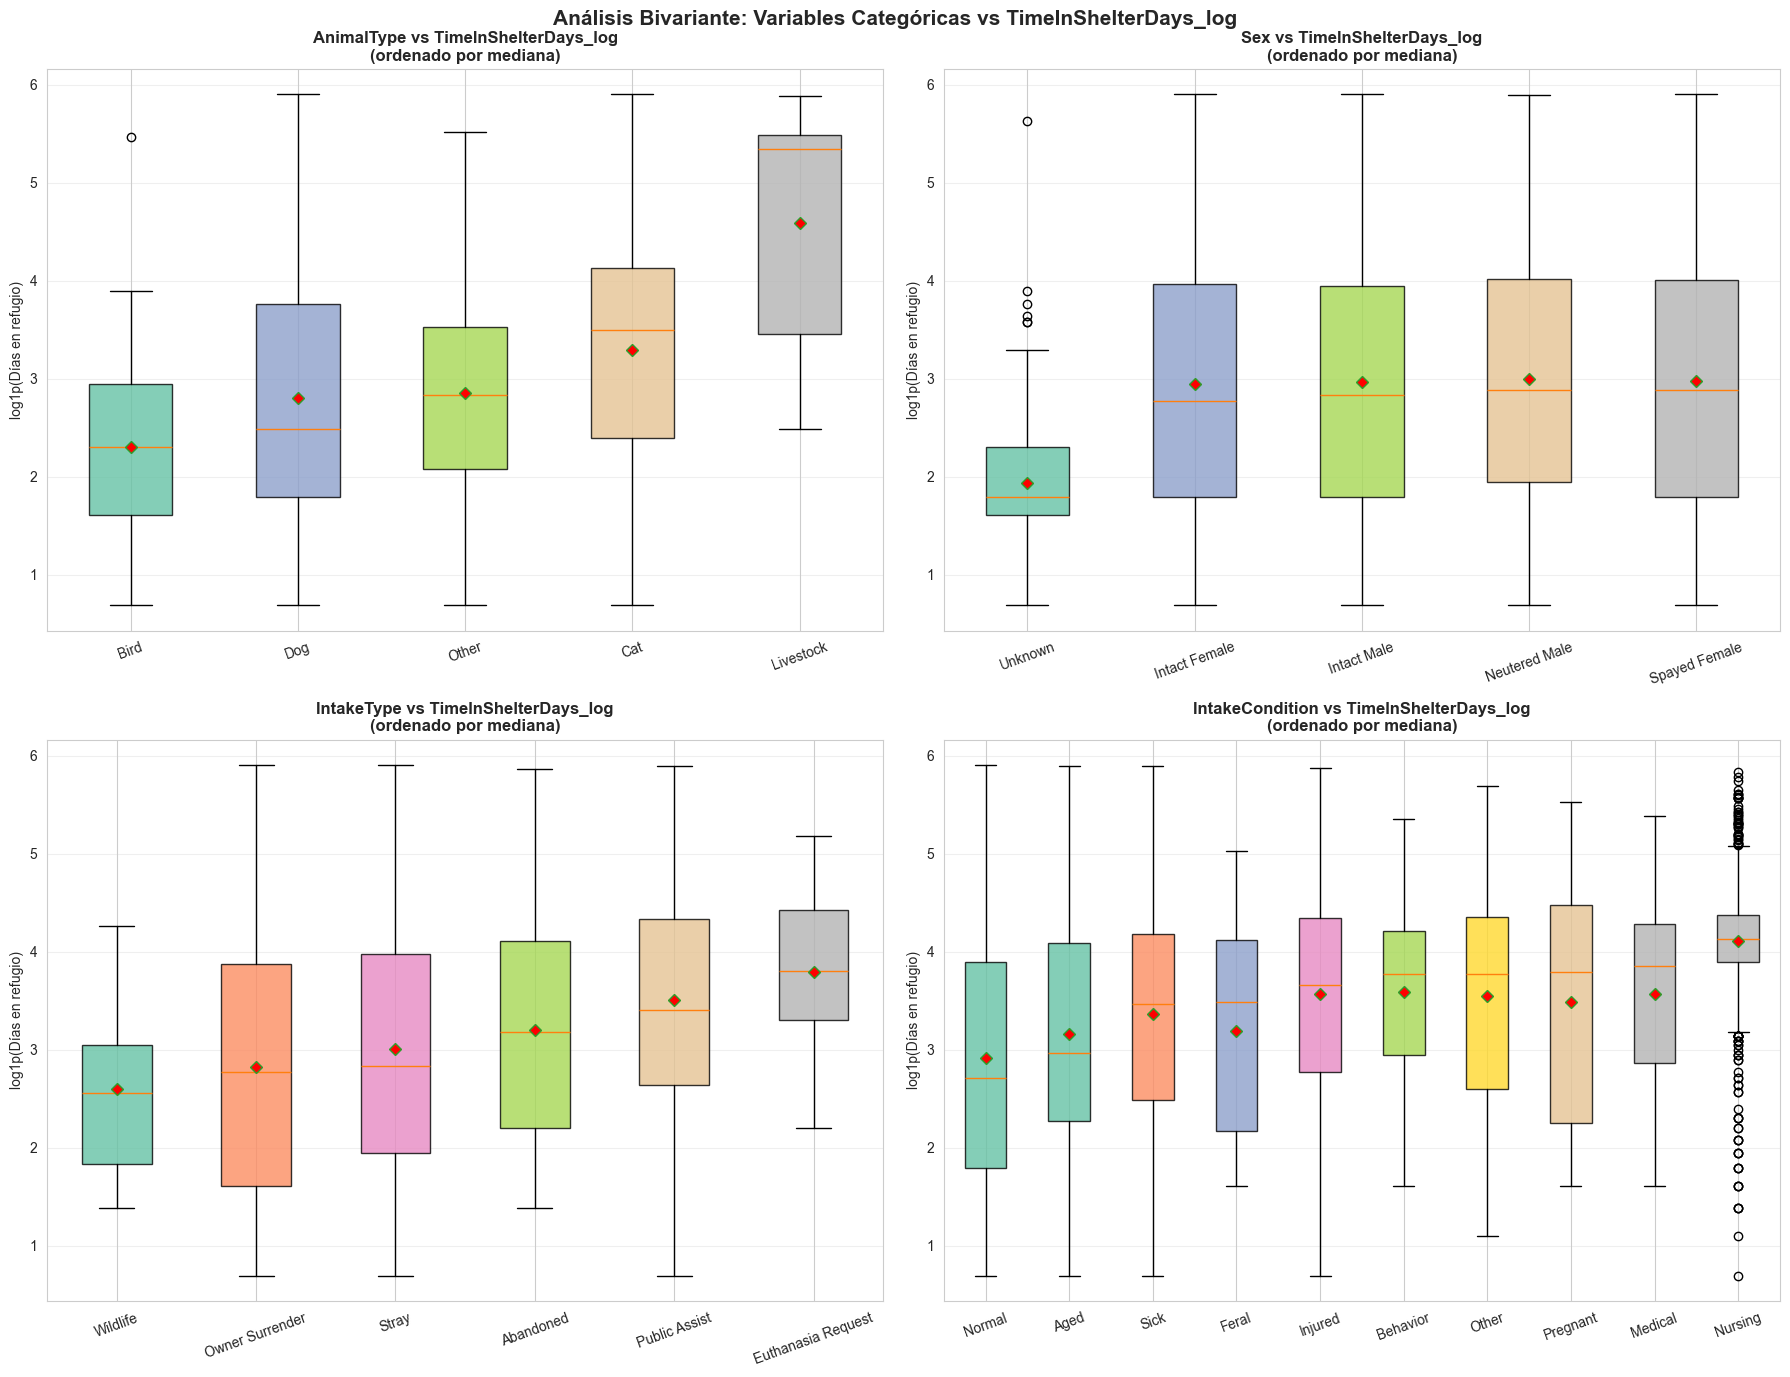

MEDIAS Y MEDIANAS POR CATEGORÍA (en escala log1p)

📊 AnimalType:
            Media (log)  Mediana (log)      N  Media (días)  Mediana (días)
AnimalType                                                                 
Bird           2.305887       2.302585    166           9.0             9.0
Dog            2.801344       2.484907  34736          15.5            11.0
Other          2.853031       2.833213    489          16.3            16.0
Cat            3.291407       3.496508  17919          25.9            32.0
Livestock      4.592246       5.342941      8          97.7           208.1

📊 Sex:
               Media (log)  Mediana (log)      N  Media (días)  Mediana (días)
Sex                                                                           
Unknown           1.937972       1.791759    134           5.9             5.0
Intact Female     2.951250       2.772589  18671          18.1            15.0
Intact Male       2.966964       2.833213  19111          18.4            16.0


In [68]:
# ============================================
# BIVARIANTE: CATEGÓRICAS vs TimeInShelterDays_log
# ============================================

cat_vars = ['AnimalType', 'Sex', 'IntakeType', 'IntakeCondition']

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(cat_vars):
    # Ordenar categorías por mediana
    orden = df_clean.groupby(col)['TimeInShelterDays_log'].median().sort_values().index
    
    data_plot = [df_clean[df_clean[col] == cat]['TimeInShelterDays_log'].values 
                 for cat in orden]
    
    bp = axes[i].boxplot(data_plot, labels=orden, patch_artist=True,
                          showmeans=True, vert=True,
                          meanprops=dict(marker='D', markerfacecolor='red', markersize=6))
    
    colors = plt.cm.Set2(np.linspace(0, 1, len(orden)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)
    
    # Añadir medias como texto
    medias = df_clean.groupby(col)['TimeInShelterDays_log'].mean()
    medianas = df_clean.groupby(col)['TimeInShelterDays_log'].median()
    
    axes[i].set_title(f'{col} vs TimeInShelterDays_log\n(ordenado por mediana)', 
                      fontsize=12, fontweight='bold')
    axes[i].set_ylabel('log1p(Días en refugio)', fontsize=10)
    axes[i].tick_params(axis='x', rotation=20)
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Análisis Bivariante: Variables Categóricas vs TimeInShelterDays_log',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

# Tabla de medias y medianas por categoría
print("="*70)
print("MEDIAS Y MEDIANAS POR CATEGORÍA (en escala log1p)")
print("="*70)
for col in cat_vars:
    print(f"\n📊 {col}:")
    resumen = df_clean.groupby(col)['TimeInShelterDays_log'].agg(['mean','median','count'])
    resumen['mean_dias'] = np.expm1(resumen['mean']).round(1)
    resumen['median_dias'] = np.expm1(resumen['median']).round(1)
    resumen.columns = ['Media (log)', 'Mediana (log)', 'N', 'Media (días)', 'Mediana (días)']
    print(resumen.sort_values('Mediana (log)').to_string())

C:\Users\zulay\AppData\Local\Temp\ipykernel_12624\1141542194.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(data_grupos, labels=orden_grupos, patch_artist=True,


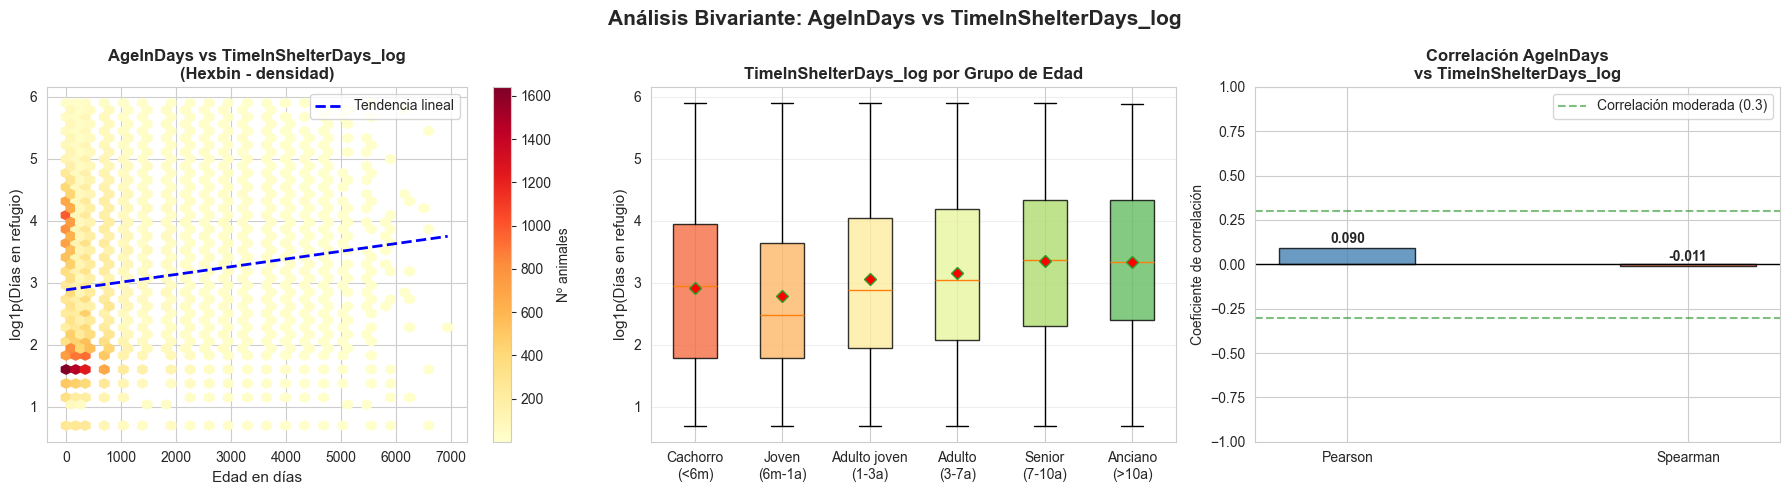


📊 CORRELACIONES AgeInDays vs TimeInShelterDays_log:
   Pearson:  0.0902
   Spearman: -0.0106


In [69]:
# ============================================
# BIVARIANTE: AgeInDays vs TimeInShelterDays_log
# ============================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatterplot con densidad
axes[0].hexbin(df_clean['AgeInDays'], df_clean['TimeInShelterDays_log'],
               gridsize=40, cmap='YlOrRd', mincnt=1)
axes[0].set_xlabel('Edad en días', fontsize=11)
axes[0].set_ylabel('log1p(Días en refugio)', fontsize=11)
axes[0].set_title('AgeInDays vs TimeInShelterDays_log\n(Hexbin - densidad)', fontweight='bold')
plt.colorbar(axes[0].collections[0], ax=axes[0], label='Nº animales')

# Línea de tendencia
z = np.polyfit(df_clean['AgeInDays'], df_clean['TimeInShelterDays_log'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_clean['AgeInDays'].min(), df_clean['AgeInDays'].max(), 100)
axes[0].plot(x_line, p(x_line), 'b--', linewidth=2, label='Tendencia lineal')
axes[0].legend()

# Boxplot por grupo de edad
orden_grupos = ['Cachorro\n(<6m)', 'Joven\n(6m-1a)', 'Adulto joven\n(1-3a)',
                'Adulto\n(3-7a)', 'Senior\n(7-10a)', 'Anciano\n(>10a)']
data_grupos = [df_clean[df_clean['AgeGroup'] == g]['TimeInShelterDays_log'].dropna().values
               for g in orden_grupos]

bp = axes[1].boxplot(data_grupos, labels=orden_grupos, patch_artist=True,
                      showmeans=True,
                      meanprops=dict(marker='D', markerfacecolor='red', markersize=6))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(orden_grupos)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
axes[1].set_title('TimeInShelterDays_log por Grupo de Edad', fontweight='bold')
axes[1].set_ylabel('log1p(Días en refugio)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

# Correlación
corr_pearson = df_clean['AgeInDays'].corr(df_clean['TimeInShelterDays_log'])
corr_spearman = df_clean['AgeInDays'].corr(df_clean['TimeInShelterDays_log'], method='spearman')

axes[2].bar(['Pearson', 'Spearman'], [corr_pearson, corr_spearman],
            color=['steelblue', 'coral'], edgecolor='black', alpha=0.8, width=0.4)
axes[2].axhline(0, color='black', linewidth=1)
axes[2].axhline(0.3, color='green', linestyle='--', alpha=0.5, label='Correlación moderada (0.3)')
axes[2].axhline(-0.3, color='green', linestyle='--', alpha=0.5)
axes[2].set_ylim(-1, 1)
axes[2].set_title('Correlación AgeInDays\nvs TimeInShelterDays_log', fontweight='bold')
axes[2].set_ylabel('Coeficiente de correlación')
axes[2].legend()
for j, (nombre, val) in enumerate(zip(['Pearson', 'Spearman'], [corr_pearson, corr_spearman])):
    axes[2].text(j, val + 0.03, f'{val:.3f}', ha='center', fontweight='bold')

plt.suptitle('Análisis Bivariante: AgeInDays vs TimeInShelterDays_log',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n📊 CORRELACIONES AgeInDays vs TimeInShelterDays_log:")
print(f"   Pearson:  {corr_pearson:.4f}")
print(f"   Spearman: {corr_spearman:.4f}")

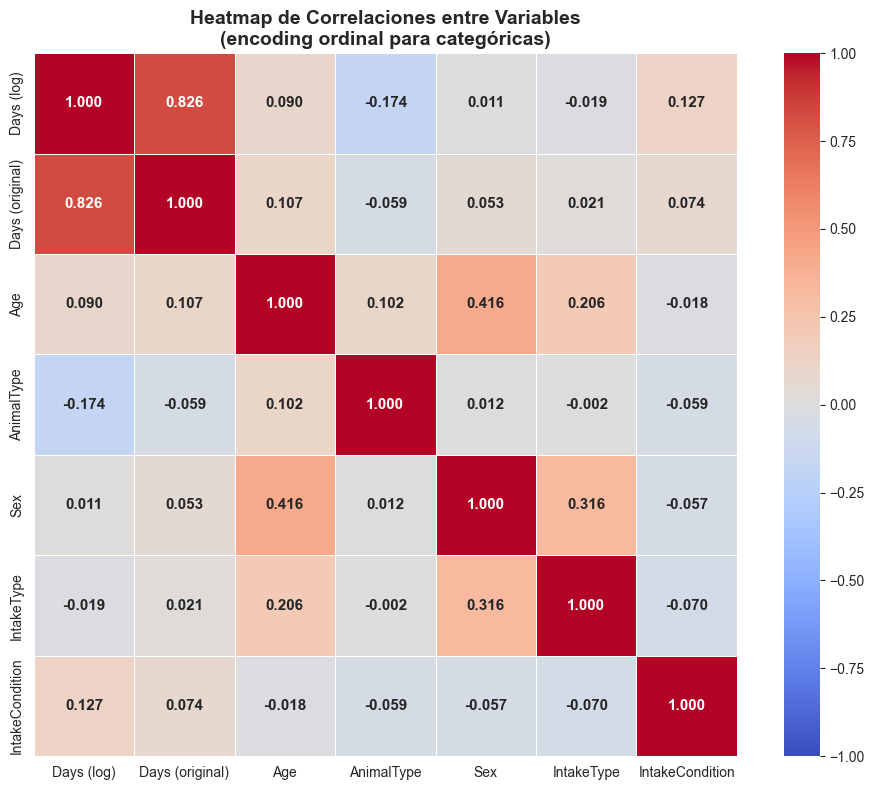

RANKING: CORRELACIÓN CON TimeInShelterDays_log
   🔴 Alta  Days (original)            +0.8260
   🟡 Moderada  AnimalType                 -0.1743
   🟡 Moderada  IntakeCondition            +0.1266
   ⚪ Baja  Age                        +0.0902
   ⚪ Baja  IntakeType                 -0.0193
   ⚪ Baja  Sex                        +0.0106


In [70]:
# ============================================
# MULTIVARIANTE: HEATMAP DE CORRELACIONES
# ============================================

# Encoding simple para incluir categóricas
df_encoded = df_clean.copy()

# Label encoding ordinal donde tiene sentido
df_encoded['Sex_enc'] = df_encoded['Sex'].map({
    'Intact Male': 0, 'Intact Female': 1, 'Neutered Male': 2, 'Spayed Female': 3
}).fillna(-1)

df_encoded['AnimalType_enc'] = df_encoded['AnimalType'].map({
    'Cat': 0, 'Dog': 1, 'Bird': 2, 'Other': 3
}).fillna(-1)

df_encoded['IntakeCondition_enc'] = df_encoded['IntakeCondition'].map({
    'Normal': 0, 'Nursing': 1, 'Sick': 2, 'Injured': 3, 'Feral': 4, 'Other': 5
}).fillna(-1)

df_encoded['IntakeType_enc'] = df_encoded['IntakeType'].map({
    'Stray': 0, 'Owner Surrender': 1, 'Public Assist': 2, 
    'Abandoned': 3, 'Wildlife': 4
}).fillna(-1)

cols_corr = ['TimeInShelterDays_log', 'TimeInShelterDays', 'AgeInDays',
             'AnimalType_enc', 'Sex_enc', 'IntakeType_enc', 'IntakeCondition_enc']

corr_matrix = df_encoded[cols_corr].corr()

# Renombrar para legibilidad
labels = {
    'TimeInShelterDays_log': 'Days (log)',
    'TimeInShelterDays':     'Days (original)',
    'AgeInDays':             'Age',
    'AnimalType_enc':        'AnimalType',
    'Sex_enc':               'Sex',
    'IntakeType_enc':        'IntakeType',
    'IntakeCondition_enc':   'IntakeCondition'
}
corr_matrix = corr_matrix.rename(index=labels, columns=labels)

fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, vmin=-1, vmax=1,
            square=True, linewidths=0.5,
            annot_kws={'size': 11, 'weight': 'bold'},
            ax=ax)

ax.set_title('Heatmap de Correlaciones entre Variables\n(encoding ordinal para categóricas)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Ranking de correlaciones con la variable objetivo
print("="*70)
print("RANKING: CORRELACIÓN CON TimeInShelterDays_log")
print("="*70)
corr_target = corr_matrix['Days (log)'].drop('Days (log)').sort_values(key=abs, ascending=False)
for var, val in corr_target.items():
    nivel = '🔴 Alta' if abs(val) > 0.3 else '🟡 Moderada' if abs(val) > 0.1 else '⚪ Baja'
    print(f"   {nivel}  {var:25s}  {val:+.4f}")

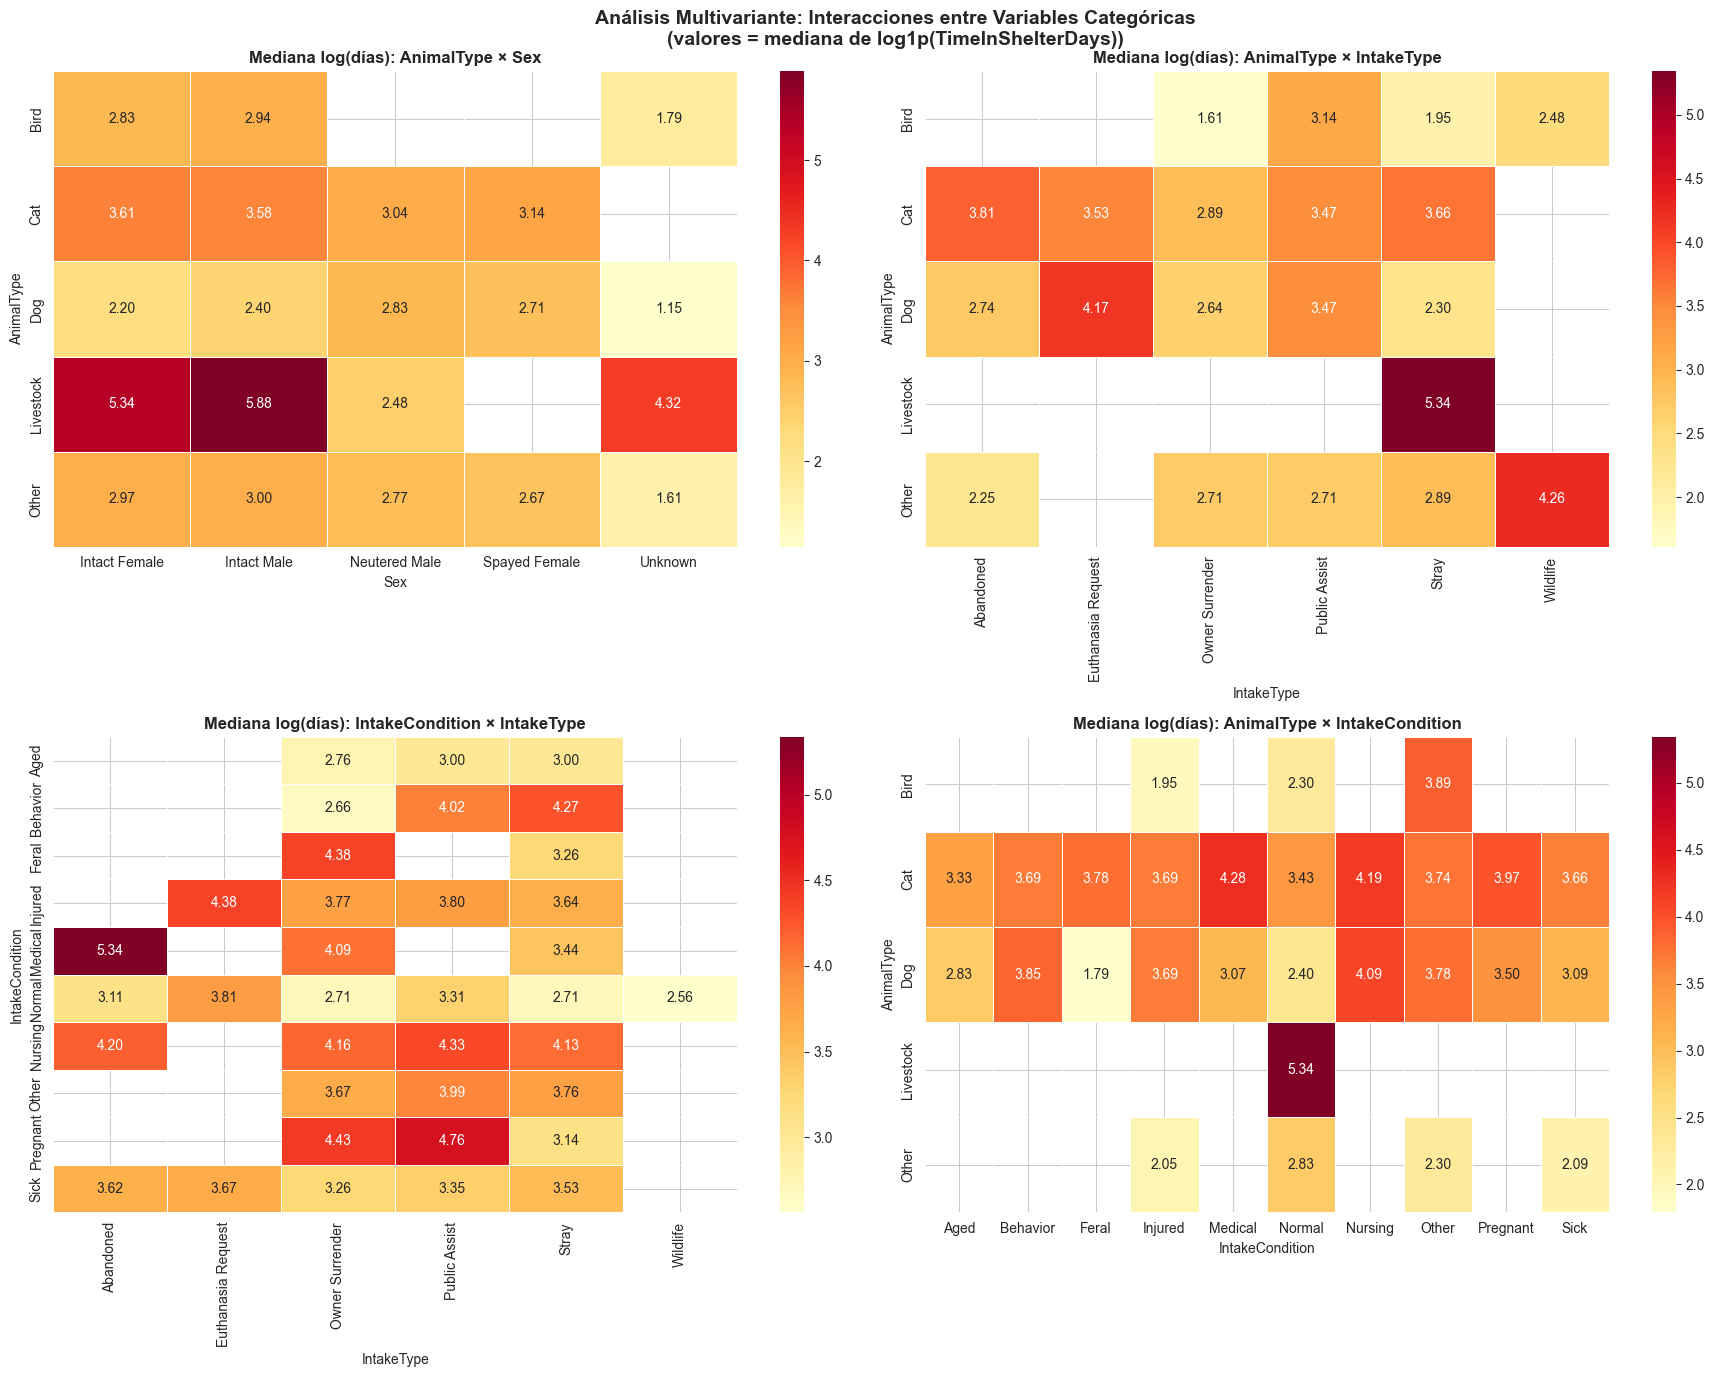

In [71]:
# ============================================
# MULTIVARIANTE: INTERACCIONES ENTRE VARIABLES
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. AnimalType x Sex
pivot1 = df_clean.groupby(['AnimalType', 'Sex'])['TimeInShelterDays_log'].median().unstack()
sns.heatmap(pivot1, annot=True, fmt='.2f', cmap='YlOrRd',
            ax=axes[0, 0], linewidths=0.5, annot_kws={'size': 10})
axes[0, 0].set_title('Mediana log(días): AnimalType × Sex', fontweight='bold')

# 2. AnimalType x IntakeType
pivot2 = df_clean.groupby(['AnimalType', 'IntakeType'])['TimeInShelterDays_log'].median().unstack()
sns.heatmap(pivot2, annot=True, fmt='.2f', cmap='YlOrRd',
            ax=axes[0, 1], linewidths=0.5, annot_kws={'size': 10})
axes[0, 1].set_title('Mediana log(días): AnimalType × IntakeType', fontweight='bold')

# 3. IntakeCondition x IntakeType
pivot3 = df_clean.groupby(['IntakeCondition', 'IntakeType'])['TimeInShelterDays_log'].median().unstack()
sns.heatmap(pivot3, annot=True, fmt='.2f', cmap='YlOrRd',
            ax=axes[1, 0], linewidths=0.5, annot_kws={'size': 10})
axes[1, 0].set_title('Mediana log(días): IntakeCondition × IntakeType', fontweight='bold')

# 4. AnimalType x IntakeCondition
pivot4 = df_clean.groupby(['AnimalType', 'IntakeCondition'])['TimeInShelterDays_log'].median().unstack()
sns.heatmap(pivot4, annot=True, fmt='.2f', cmap='YlOrRd',
            ax=axes[1, 1], linewidths=0.5, annot_kws={'size': 10})
axes[1, 1].set_title('Mediana log(días): AnimalType × IntakeCondition', fontweight='bold')

plt.suptitle('Análisis Multivariante: Interacciones entre Variables Categóricas\n'
             '(valores = mediana de log1p(TimeInShelterDays))',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

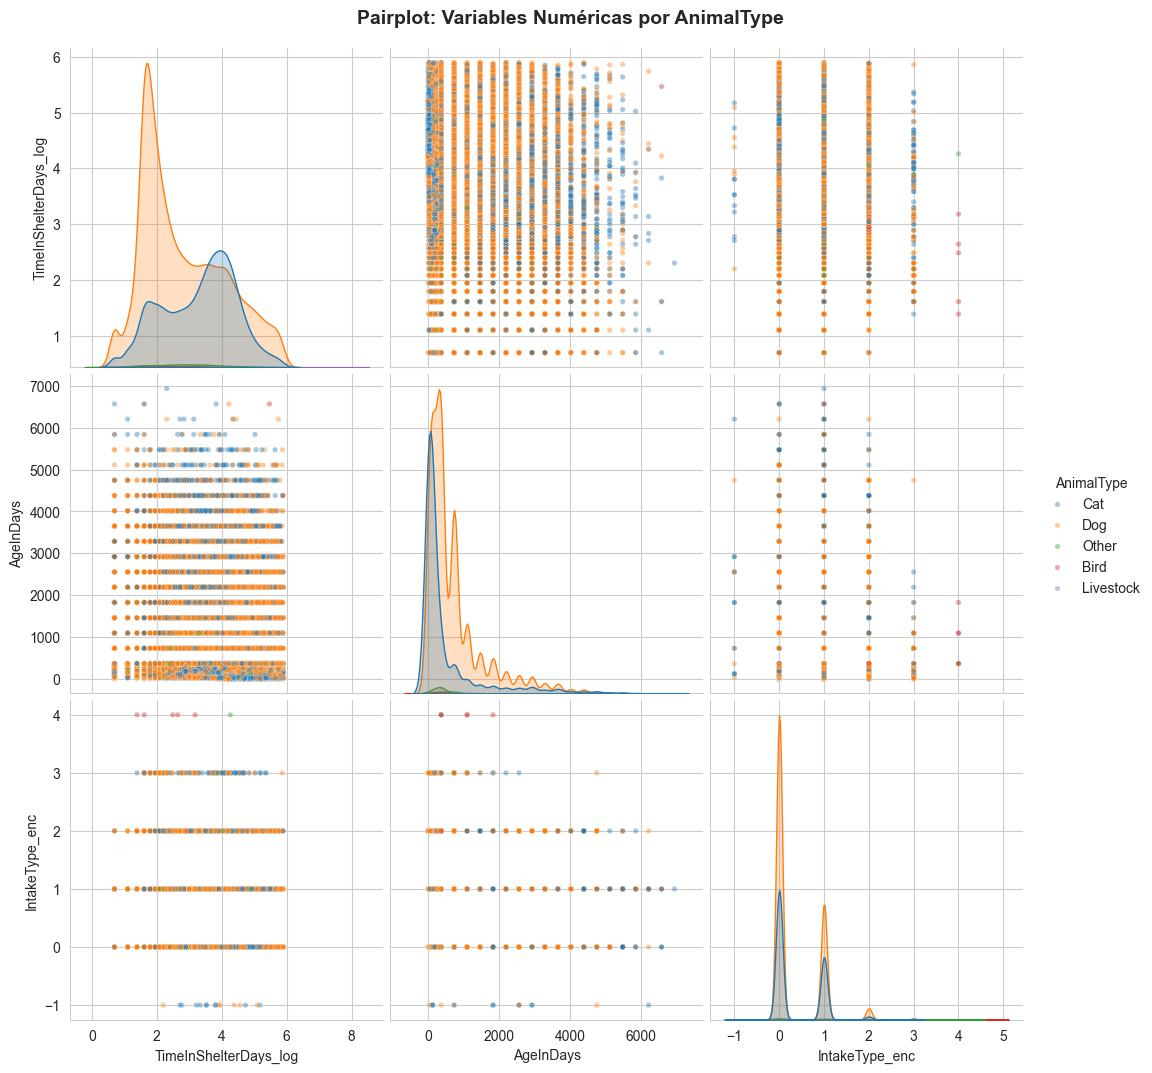

In [72]:
# ============================================
# MULTIVARIANTE: PAIRPLOT VARIABLES NUMÉRICAS
# ============================================

df_pairplot = df_encoded[['TimeInShelterDays_log', 'AgeInDays', 
                            'AnimalType_enc', 'IntakeType_enc']].copy()
df_pairplot['AnimalType'] = df_clean['AnimalType']

g = sns.pairplot(
    df_pairplot,
    vars=['TimeInShelterDays_log', 'AgeInDays', 'IntakeType_enc'],
    hue='AnimalType',
    diag_kind='kde',
    plot_kws={'alpha': 0.4, 's': 15},
    height=3.5
)
g.figure.suptitle('Pairplot: Variables Numéricas por AnimalType',
                   fontsize=14, fontweight='bold', y=1.02)
plt.show()

In [73]:
df_clean['Color'] == 'Tricolor' 


0        False
1        False
2        False
3         True
4        False
         ...  
53313    False
53314     True
53315    False
53316     True
53317    False
Name: Color, Length: 53318, dtype: bool

In [74]:
# ============================================
# LIMPIEZA Y TRANSFORMACIÓN DE VARIABLES
# ============================================

import numpy as np
import pandas as pd

df_model = df_clean.copy()
n_inicial = len(df_model)
print(f"📊 Filas iniciales: {n_inicial:,}")
print("="*70)

📊 Filas iniciales: 53,318


In [75]:
# ============================================
# 1. AnimalType
# ============================================

print("\n📊 ANTES - AnimalType:")
print(df_model['AnimalType'].value_counts())

categorias_eliminar = ['Other', 'Bird', 'Livestock']
df_model = df_model[~df_model['AnimalType'].isin(categorias_eliminar)].copy()

print(f"\n📊 DESPUÉS - AnimalType:")
print(df_model['AnimalType'].value_counts())
print(f"   Filas eliminadas: {n_inicial - len(df_model):,}")
print(f"   Filas restantes:  {len(df_model):,}")


📊 ANTES - AnimalType:
AnimalType
Dog          34736
Cat          17919
Other          489
Bird           166
Livestock        8
Name: count, dtype: int64

📊 DESPUÉS - AnimalType:
AnimalType
Dog    34736
Cat    17919
Name: count, dtype: int64
   Filas eliminadas: 663
   Filas restantes:  52,655


In [76]:
# ============================================
# 2. Breed
# ============================================

print("\n" + "="*70)
print("2. BREED")
print("="*70)

# 2a. is_mix: ¿contiene la palabra "Mix"?
df_model['is_mix'] = df_model['Breed'].str.contains('Mix', case=False).astype(int)

# 2b. breed_type
def clasificar_breed(breed):
    if 'Domestic' in breed:
        return 'domestic'
    elif 'Mix' in breed:
        return 'mix'
    else:
        return 'purebred'

df_model['breed_type'] = df_model['Breed'].apply(clasificar_breed)

# 2c. Top 25 razas → resto = 'Other'
top_razas = df_model['Breed'].value_counts().head(25).index
df_model['Breed_grouped'] = df_model['Breed'].apply(
    lambda x: x if x in top_razas else 'Other'
)

# 2d. Verificación
print(f"\n✅ is_mix:")
print(df_model['is_mix'].value_counts())

print(f"\n✅ breed_type:")
print(df_model['breed_type'].value_counts())

print(f"\n✅ Breed_grouped (top 25 + Other):")
print(df_model['Breed_grouped'].value_counts().to_string())

# 2e. Eliminar Breed original
df_model.drop(columns=['Breed'], inplace=True)
print(f"\n🗑️  Columna 'Breed' original eliminada")


2. BREED

✅ is_mix:
is_mix
1    37707
0    14948
Name: count, dtype: int64

✅ breed_type:
breed_type
mix         24755
domestic    16605
purebred    11295
Name: count, dtype: int64

✅ Breed_grouped (top 25 + Other):
Breed_grouped
Other                        17415
Domestic Shorthair Mix       10814
Pit Bull Mix                  3631
Labrador Retriever Mix        3266
Domestic Shorthair            3027
Chihuahua Shorthair Mix       2682
German Shepherd Mix           1636
Domestic Medium Hair Mix      1397
Australian Cattle Dog Mix      908
Domestic Longhair Mix          741
Siamese Mix                    583
Pit Bull                       574
Border Collie Mix              530
Dachshund Mix                  525
Boxer Mix                      518
Labrador Retriever             506
German Shepherd                493
Chihuahua Shorthair            452
Staffordshire Mix              441
Catahoula Mix                  432
Domestic Medium Hair           429
Pointer Mix                    358

In [77]:
# ============================================
# 3. Color
# ============================================

print("\n" + "="*70)
print("3. COLOR")
print("="*70)

print(f"\n📊 ANTES:")
print(f"   Colores únicos: {df_model['Color'].nunique()}")
print(df_model['Color'].value_counts().head(10))

# Decidimos cuántos mantener viendo la distribución
top_n_colores = 20
top_colores = df_model['Color'].value_counts().head(top_n_colores).index
df_model['Color_grouped'] = df_model['Color'].apply(
    lambda x: x if x in top_colores else 'Other'
)

print(f"\n📊 DESPUÉS - Color_grouped (top {top_n_colores} + Other):")
print(df_model['Color_grouped'].value_counts().to_string())

# Cuántos registros quedan en Other
n_other_color = (df_model['Color_grouped'] == 'Other').sum()
print(f"\n   Registros agrupados en 'Other': {n_other_color:,} "
      f"({n_other_color/len(df_model)*100:.1f}%)")

# Eliminar Color original
df_model.drop(columns=['Color'], inplace=True)
print(f"🗑️  Columna 'Color' original eliminada")


3. COLOR

📊 ANTES:
   Colores únicos: 416
Color
Black/White          5860
Black                3635
Brown Tabby          2319
Brown/White          1966
Tan/White            1942
White/Black          1653
Blue/White           1626
White                1612
Tan                  1480
Brown Tabby/White    1448
Name: count, dtype: int64

📊 DESPUÉS - Color_grouped (top 20 + Other):
Color_grouped
Other                  17441
Black/White             5860
Black                   3635
Brown Tabby             2319
Brown/White             1966
Tan/White               1942
White/Black             1653
Blue/White              1626
White                   1612
Tan                     1480
Brown Tabby/White       1448
Tricolor                1407
Black/Tan               1400
Brown                   1291
Black/Brown             1285
Brown Brindle/White     1183
Orange Tabby            1174
White/Brown             1131
Brown/Black              971
White/Tan                948
Blue                     8

In [78]:
# ============================================
# 4. Sex
# ============================================

print("\n" + "="*70)
print("4. SEX")
print("="*70)

print(f"\n📊 ANTES - Sex:")
print(df_model['Sex'].value_counts())

df_model = df_model[df_model['Sex'] != 'Unknown'].copy()

print(f"\n📊 DESPUÉS - Sex:")
print(df_model['Sex'].value_counts())
print(f"   Filas restantes: {len(df_model):,}")


4. SEX

📊 ANTES - Sex:
Sex
Intact Male      18859
Intact Female    18482
Neutered Male     7699
Spayed Female     7613
Unknown              2
Name: count, dtype: int64

📊 DESPUÉS - Sex:
Sex
Intact Male      18859
Intact Female    18482
Neutered Male     7699
Spayed Female     7613
Name: count, dtype: int64
   Filas restantes: 52,653


In [79]:
# ============================================
# 5. IntakeType
# ============================================

print("\n" + "="*70)
print("5. INTAKETYPE")
print("="*70)

print(f"\n📊 ANTES - IntakeType:")
print(df_model['IntakeType'].value_counts())

# Verificación previa: ¿Public Assist y Stray tienen tiempos similares?
print(f"\n🔍 VERIFICACIÓN — Mediana de días por IntakeType:")
verificacion = df_model.groupby('IntakeType')['TimeInShelterDays'].agg(['median', 'mean', 'count'])
print(verificacion.sort_values('median'))

print(f"\n⚠️  Revisa si Public Assist y Stray tienen medianas similares antes de fusionar.")
print(f"    Si son muy distintas, considera mantenerlas separadas.")




5. INTAKETYPE

📊 ANTES - IntakeType:
IntakeType
Stray                 36271
Owner Surrender       15029
Public Assist          1193
Abandoned               144
Euthanasia Request       16
Name: count, dtype: int64

🔍 VERIFICACIÓN — Mediana de días por IntakeType:
                    median       mean  count
IntakeType                                  
Owner Surrender       15.0  39.838512  15029
Stray                 16.0  40.860219  36271
Abandoned             23.0  42.409722    144
Public Assist         31.0  65.680637   1193
Euthanasia Request    44.0  60.250000     16

⚠️  Revisa si Public Assist y Stray tienen medianas similares antes de fusionar.
    Si son muy distintas, considera mantenerlas separadas.


In [80]:
# ============================================
# 6. IntakeCondition
# ============================================

print("\n" + "="*70)
print("6. INTAKECONDITION")
print("="*70)

print(f"\n📊 ANTES - IntakeCondition:")
print(df_model['IntakeCondition'].value_counts())

df_model = df_model[~df_model['IntakeCondition'].isin(['Feral', 'Other'])].copy()

print(f"\n📊 DESPUÉS - IntakeCondition:")
print(df_model['IntakeCondition'].value_counts())
print(f"   Filas restantes: {len(df_model):,}")


6. INTAKECONDITION

📊 ANTES - IntakeCondition:
IntakeCondition
Normal      48607
Injured      1880
Nursing      1012
Sick          891
Aged           92
Other          78
Pregnant       32
Medical        27
Feral          24
Behavior       10
Name: count, dtype: int64

📊 DESPUÉS - IntakeCondition:
IntakeCondition
Normal      48607
Injured      1880
Nursing      1012
Sick          891
Aged           92
Pregnant       32
Medical        27
Behavior       10
Name: count, dtype: int64
   Filas restantes: 52,551


In [81]:
# ============================================
# 3. COLOR — Monocolor / Bicolor / Tricolor
# ============================================

print("\n" + "="*70)
print("3. COLOR")
print("="*70)

print(f"\n📊 ANTES:")
print(f"   Colores únicos: {df_model['Color'].nunique()}")
print(df_model['Color'].value_counts().head(15))

def clasificar_color(color):
    color = str(color).strip()
    separadores = color.count('/') + color.count(' and ')
    
    if separadores == 0:
        return 'Monocolor'
    elif separadores == 1:
        return 'Bicolor'
    else:
        return 'Tricolor'

df_model['Color_grouped'] = df_model['Color'].apply(clasificar_color)

print(f"\n📊 DESPUÉS - Color_grouped:")
print(df_model['Color_grouped'].value_counts())
print(f"\n   Distribución porcentual:")
print((df_model['Color_grouped'].value_counts() / len(df_model) * 100).round(1))

# Eliminar Color original
df_model.drop(columns=['Color'], inplace=True)
print(f"\n🗑️  Columna 'Color' original eliminada")


3. COLOR

📊 ANTES:


KeyError: 'Color'

In [ ]:
df_model.isnull().sum()

AnimalType                 0
Sex                        0
IntakeType                 0
IntakeCondition            0
TimeInShelterDays          0
AgeInDays                  0
TimeInShelterDays_log      0
AgeInYears                 0
AgeGroup                 272
is_mix                     0
breed_type                 0
Breed_grouped              0
Color_grouped              0
dtype: int64

In [ ]:
# ============================================
# 5. INTAKETYPE — SIN fusionar Public Assist
# ============================================

print("\n" + "="*70)
print("5. INTAKETYPE")
print("="*70)

print(f"\n📊 ANTES:")
print(df_model['IntakeType'].value_counts())

# Solo eliminamos Euthanasia Request (16 registros)
# Mantenemos Public Assist separado: su mediana (31d) 
# es muy distinta a Stray (16d)
df_model = df_model[df_model['IntakeType'] != 'Euthanasia Request'].copy()

print(f"\n📊 DESPUÉS:")
print(df_model['IntakeType'].value_counts())
print(f"   Filas restantes: {len(df_model):,}")


5. INTAKETYPE

📊 ANTES:
IntakeType
Stray                 36209
Owner Surrender       15000
Public Assist          1182
Abandoned               144
Euthanasia Request       16
Name: count, dtype: int64

📊 DESPUÉS:
IntakeType
Stray              36209
Owner Surrender    15000
Public Assist       1182
Abandoned            144
Name: count, dtype: int64
   Filas restantes: 52,535


In [ ]:
# ============================================
# RESUMEN FINAL
# ============================================

print("\n" + "="*70)
print("RESUMEN FINAL DE LA LIMPIEZA")
print("="*70)

print(f"\n   Filas iniciales:   {n_inicial:,}")
print(f"   Filas finales:     {len(df_model):,}")
print(f"   Filas eliminadas:  {n_inicial - len(df_model):,} "
      f"({(n_inicial - len(df_model))/n_inicial*100:.1f}%)")

print(f"\n📊 COLUMNAS FINALES ({len(df_model.columns)}):")
for col in df_model.columns:
    nunicos = df_model[col].nunique()
    print(f"   {col:35s}  {str(df_model[col].dtype):10s}  "
          f"{nunicos} valores únicos")

print(f"\n📊 VARIABLES CATEGÓRICAS RESULTANTES:")
cat_cols = df_model.select_dtypes('object').columns
for col in cat_cols:
    print(f"\n   {col}:")
    print(df_model[col].value_counts().to_string())

# Verificación: no deben quedar nulos
print(f"\n📊 NULOS TRAS LA LIMPIEZA:")
print(df_model.isnull().sum())

# Guardar
df_model.reset_index(drop=True, inplace=True)
df_model.to_csv('../data/pet_adoption_model.csv', index=False)
print(f"\n💾 Dataset guardado como 'pet_adoption_model.csv'")


RESUMEN FINAL DE LA LIMPIEZA

   Filas iniciales:   53,318
   Filas finales:     52,535
   Filas eliminadas:  783 (1.5%)

📊 COLUMNAS FINALES (13):
   AnimalType                           object      2 valores únicos
   Sex                                  object      4 valores únicos
   IntakeType                           object      4 valores únicos
   IntakeCondition                      object      8 valores únicos
   TimeInShelterDays                    int64       365 valores únicos
   AgeInDays                            int64       42 valores únicos
   TimeInShelterDays_log                float64     365 valores únicos
   AgeInYears                           float64     42 valores únicos
   AgeGroup                             category    6 valores únicos
   is_mix                               int64       2 valores únicos
   breed_type                           object      3 valores únicos
   Breed_grouped                        object      26 valores únicos
   Color_grouped 

In [ ]:
df_model.head()

,AnimalType,Sex,IntakeType,IntakeCondition,TimeInShelterDays,AgeInDays,TimeInShelterDays_log,AgeInYears,AgeGroup,is_mix,breed_type,Breed_grouped,Color_grouped
0,Cat,Intact Male,Stray,Normal,35,28,3.583519,0.076712,Cachorro\n(<6m),0,domestic,Domestic Shorthair,Monocolor
1,Dog,Intact Male,Stray,Normal,4,730,1.609438,2.000000,Adulto joven\n(1-3a),0,purebred,Chihuahua Shorthair,Bicolor
2,Dog,Intact Female,Stray,Normal,139,150,4.941642,0.410959,Cachorro\n(<6m),0,purebred,Pit Bull,Bicolor
3,Dog,Intact Female,Stray,Normal,112,730,4.727388,2.000000,Adulto joven\n(1-3a),0,purebred,Chihuahua Shorthair,Monocolor
4,Cat,Neutered Male,Owner Surrender,Normal,76,5110,4.343805,14.000000,Anciano\n(>10a),1,domestic,Domestic Shorthair Mix,Bicolor


In [ ]:
# ============================================
# CORRECCIÓN 1: Color_grouped con Tricolor
# ============================================

def clasificar_color(color):
    color = str(color).strip()
    
    # Casos donde "Tricolor" aparece como palabra literal
    if 'Tricolor' in color or 'tricolor' in color:
        return 'Tricolor'
    
    # Contar separadores para el resto
    n_separadores = color.count('/') + color.count(' and ')
    
    if n_separadores == 0:
        return 'Monocolor'
    elif n_separadores == 1:
        return 'Bicolor'
    else:
        return 'Tricolor'

# Necesitamos la columna Color original
# Si ya la eliminaste, recárgala del CSV anterior
df_original = pd.read_csv('../data/pet_adoption_clean.csv')

# Reindexar para que coincida con df_model
df_model['Color_grouped'] = df_original.loc[df_model.index, 'Color'].apply(clasificar_color)

print("📊 Color_grouped corregido:")
print(df_model['Color_grouped'].value_counts())
print(f"\n   Distribución porcentual:")
print((df_model['Color_grouped'].value_counts() / len(df_model) * 100).round(2))

# Verificar que no haya nulos
print(f"\n   Nulos en Color_grouped: {df_model['Color_grouped'].isnull().sum()}")

📊 Color_grouped corregido:
Color_grouped
Bicolor      30200
Monocolor    20248
Tricolor      2087
Name: count, dtype: int64

   Distribución porcentual:
Color_grouped
Bicolor      57.49
Monocolor    38.54
Tricolor      3.97
Name: count, dtype: float64

   Nulos en Color_grouped: 0


In [ ]:
# ============================================
# CORRECCIÓN 2: AgeGroup — investigar los 272 nulos
# ============================================

print("\n📊 Investigando los 272 nulos en AgeGroup:")
nulos_age = df_model[df_model['AgeGroup'].isnull()]
print(f"   Registros con AgeGroup nulo: {len(nulos_age)}")
print(f"\n   Estadísticas de AgeInDays en esos registros:")
print(nulos_age['AgeInDays'].describe())
print(f"\n   Valores únicos de AgeInDays en nulos:")
print(sorted(nulos_age['AgeInDays'].unique()))


📊 Investigando los 272 nulos en AgeGroup:
   Registros con AgeGroup nulo: 272

   Estadísticas de AgeInDays en esos registros:
count    272.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: AgeInDays, dtype: float64

   Valores únicos de AgeInDays en nulos:
[np.int64(0)]


In [ ]:
# Una vez veas qué valores de AgeInDays producen nulos,
# expandimos los bins para cubrirlos todos

bins_edad  = [0, 182, 365, 1095, 2555, 3650, 100000]
labels_edad = ['Cachorro (<6m)', 'Joven (6m-1a)', 'Adulto joven (1-3a)',
               'Adulto (3-7a)', 'Senior (7-10a)', 'Anciano (>10a)']

df_model['AgeGroup'] = pd.cut(
    df_model['AgeInDays'],
    bins=bins_edad,
    labels=labels_edad,
    right=True,
    include_lowest=True   # <- esto cubre el valor mínimo exacto (0 o 1)
)

print(f"\n📊 AgeGroup corregido:")
print(df_model['AgeGroup'].value_counts().sort_index())
print(f"\n   Nulos restantes: {df_model['AgeGroup'].isnull().sum()}")


📊 AgeGroup corregido:
AgeGroup
Cachorro (<6m)         21122
Joven (6m-1a)          12960
Adulto joven (1-3a)    10587
Adulto (3-7a)           5202
Senior (7-10a)          1904
Anciano (>10a)           760
Name: count, dtype: int64

   Nulos restantes: 0


In [ ]:
# ============================================
# CORRECCIONES FINALES
# ============================================

# 1. breed_type → solo 2 categorías
# "domestic_cat" es una subcategoría de purebred (son gatos domésticos de raza)
# la fusionamos con purebred

df_model['breed_type'] = df_model['breed_type'].replace('domestic', 'purebred')

print("📊 breed_type corregido:")
print(df_model['breed_type'].value_counts())
print(f"\n   Distribución porcentual:")
print((df_model['breed_type'].value_counts() / len(df_model) * 100).round(1))

# 2. Eliminar is_mix (redundante con breed_type de 2 categorías)
df_model.drop(columns=['is_mix'], inplace=True)
print(f"\n🗑️  Columna 'is_mix' eliminada (redundante con breed_type)")

# 3. Eliminar AgeInYears
df_model.drop(columns=['AgeInYears'], inplace=True)
print(f"🗑️  Columna 'AgeInYears' eliminada (redundante con AgeInDays)")

# 4. AgeGroup → fusionar Anciano con Senior
df_model['AgeGroup'] = df_model['AgeGroup'].astype(str)
df_model['AgeGroup'] = df_model['AgeGroup'].replace('Anciano (>10a)', 'Senior (7-10a)')

# Renombrar Senior para que quede limpio
df_model['AgeGroup'] = df_model['AgeGroup'].replace('Senior (7-10a)', 'Senior (>7a)')

print(f"\n📊 AgeGroup corregido:")
print(df_model['AgeGroup'].value_counts())

# ============================================
# RESUMEN FINAL
# ============================================

print("\n" + "="*70)
print("DATASET FINAL — COLUMNAS Y ESTADO")
print("="*70)
print(f"\n   Filas: {len(df_model):,}")
print(f"   Columnas: {len(df_model.columns)}")
print(f"\n{'Columna':35s} {'Tipo':12s} {'Únicos':8s} {'Nulos'}")
print("-"*70)
for col in df_model.columns:
    print(f"{col:35s} {str(df_model[col].dtype):12s} "
          f"{df_model[col].nunique():8d} {df_model[col].isnull().sum()}")

# Guardar
df_model.to_csv('../data/pet_adoption_model.csv', index=False)
print(f"\n💾 Dataset guardado como 'pet_adoption_model.csv'")

📊 breed_type corregido:
breed_type
purebred    27829
mix         24706
Name: count, dtype: int64

   Distribución porcentual:
breed_type
purebred    53.0
mix         47.0
Name: count, dtype: float64

🗑️  Columna 'is_mix' eliminada (redundante con breed_type)
🗑️  Columna 'AgeInYears' eliminada (redundante con AgeInDays)

📊 AgeGroup corregido:
AgeGroup
Cachorro (<6m)         21122
Joven (6m-1a)          12960
Adulto joven (1-3a)    10587
Adulto (3-7a)           5202
Senior (>7a)            2664
Name: count, dtype: int64

DATASET FINAL — COLUMNAS Y ESTADO

   Filas: 52,535
   Columnas: 11

Columna                             Tipo         Únicos   Nulos
----------------------------------------------------------------------
AnimalType                          object              2 0
Sex                                 object              4 0
IntakeType                          object              4 0
IntakeCondition                     object              8 0
TimeInShelterDays              

In [ ]:
# ============================================
# ENCODING + TRAIN / VALIDATION / TEST SPLIT
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

FEATURES = ['AnimalType', 'Sex', 'IntakeType', 'IntakeCondition',
            'AgeInDays', 'AgeGroup', 'breed_type', 
            'Breed_grouped', 'Color_grouped']

TARGET = 'TimeInShelterDays_log'

X = df_model[FEATURES].copy()
y = df_model[TARGET].copy()

# ============================================
# SPLIT: 70 / 15 / 15
# Estrategia: primero separamos test (15%),
# luego del resto sacamos validation (15/85 ≈ 17.6%)
# ============================================

# Paso 1: separar test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,
    random_state=42
)

# Paso 2: del 85% restante, sacar validation (15% del total = 17.6% del temp)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.1765,
    random_state=42
)

print("="*70)
print("TRAIN / VALIDATION / TEST SPLIT")
print("="*70)
print(f"\n   Train:      {len(X_train):,} filas ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Validation: {len(X_val):,} filas ({len(X_val)/len(X)*100:.1f}%)")
print(f"   Test:       {len(X_test):,} filas ({len(X_test)/len(X)*100:.1f}%)")
print(f"   Total:      {len(X_train)+len(X_val)+len(X_test):,} filas")

# ============================================
# 1. ONE-HOT ENCODING
# ============================================

ohe_cols = ['AnimalType', 'breed_type', 'Color_grouped', 'IntakeType', 'Sex']

X_train = pd.get_dummies(X_train, columns=ohe_cols, drop_first=True, dtype=int)
X_val   = pd.get_dummies(X_val,   columns=ohe_cols, drop_first=True, dtype=int)
X_test  = pd.get_dummies(X_test,  columns=ohe_cols, drop_first=True, dtype=int)

# Alinear columnas en val y test respecto a train
X_val  = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("\n✅ One-Hot Encoding aplicado a:", ohe_cols)

# ============================================
# 2. ORDINAL ENCODING — AgeGroup
# ============================================

orden_edad = [['Cachorro (<6m)', 'Joven (6m-1a)', 'Adulto joven (1-3a)',
               'Adulto (3-7a)', 'Senior (>7a)']]

oe = OrdinalEncoder(categories=orden_edad)
X_train['AgeGroup'] = oe.fit_transform(X_train[['AgeGroup']])
X_val['AgeGroup']   = oe.transform(X_val[['AgeGroup']])
X_test['AgeGroup']  = oe.transform(X_test[['AgeGroup']])

print("✅ Ordinal Encoding aplicado a: AgeGroup")
print(f"   Orden: Cachorro=0 → Joven=1 → Adulto joven=2 → Adulto=3 → Senior=4")

# ============================================
# 3. TARGET ENCODING — IntakeCondition, Breed_grouped
# IMPORTANTE: fit solo sobre train, apply sobre val y test
# ============================================

target_cols = ['IntakeCondition', 'Breed_grouped']
global_mean = y_train.mean()
target_encoders = {}

for col in target_cols:
    means = y_train.groupby(X_train[col]).mean()
    target_encoders[col] = means
    
    X_train[col] = X_train[col].map(means)
    X_val[col]   = X_val[col].map(means).fillna(global_mean)
    X_test[col]  = X_test[col].map(means).fillna(global_mean)

print("✅ Target Encoding aplicado a:", target_cols)

print(f"\n   IntakeCondition (media log días por condición):")
print(target_encoders['IntakeCondition'].sort_values().round(3).to_string())

print(f"\n   Breed_grouped — Top 5 adopción más rápida (media log más baja):")
print(target_encoders['Breed_grouped'].sort_values().head(5).round(3).to_string())
print(f"\n   Breed_grouped — Top 5 adopción más lenta (media log más alta):")
print(target_encoders['Breed_grouped'].sort_values().tail(5).round(3).to_string())

# ============================================
# VERIFICACIÓN FINAL
# ============================================

print("\n" + "="*70)
print("VERIFICACIÓN FINAL")
print("="*70)

for nombre, Xs, ys in [('Train', X_train, y_train), 
                        ('Val',   X_val,   y_val), 
                        ('Test',  X_test,  y_test)]:
    print(f"\n   {nombre}: X={Xs.shape}  y={ys.shape}  "
          f"nulos={Xs.isnull().sum().sum()}")

print(f"\n📊 COLUMNAS FINALES DEL MODELO ({X_train.shape[1]}):")
for col in X_train.columns:
    print(f"   {col:45s}  min={X_train[col].min():.3f}  "
          f"max={X_train[col].max():.3f}")

# Guardar los 6 ficheros
X_train.to_csv('../data/X_train.csv', index=False)
X_val.to_csv('../data/X_val.csv',     index=False)
X_test.to_csv('../data/X_test.csv',   index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_val.to_csv('../data/y_val.csv',     index=False)
y_test.to_csv('../data/y_test.csv',   index=False)

print(f"\n💾 Guardados: X_train, X_val, X_test, y_train, y_val, y_test")

NameError: name 'df_model' is not defined

Todo perfecto. Los resultados son muy buenos, vamos a interpretarlos antes de pasar al modelado:

---

## ✅ Interpretación de los resultados

**Split:** 70/15/15 exacto, sin nulos en ninguno de los tres conjuntos. 

**14 columnas finales**, que es un número muy manejable para empezar a modelar.

**Target Encoding de IntakeCondition tiene sentido lógico perfecto:**

| Condición | Media log días | Interpretación |
|-----------|---------------|----------------|
| Normal | 2.903 | Se adoptan más rápido → animales sanos |
| Aged | 3.146 | Animales mayores, algo más difíciles |
| Sick / Medical | 3.3-3.5 | Necesitan recuperación antes de adopción |
| Injured / Pregnant | 3.5-3.6 | Requieren cuidados especiales |
| Behavior | 3.843 | Problemas de comportamiento dificultan adopción |
| Nursing | 4.117 | Los más lentos → necesitan cuidados intensivos hasta ser adoptables |

La progresión es completamente coherente con la realidad del refugio.

**Target Encoding de Breed_grouped también tiene sentido:**
- Los Dachshund y Poodle se adoptan rapidísimo (razas muy demandadas)
- Los Pit Bull y Staffordshire tardan más (estigma de raza)

---

## ⏭️ Pasamos al modelado

El plan es entrenar modelos en orden creciente de complejidad, evaluar cada uno en validación, y solo tocar test con el modelo ganador:

```
1. Baseline (DummyRegressor)     → referencia mínima
2. Ridge / Lasso                 → modelos lineales
3. Random Forest                 → árbol con ensemble
4. XGBoost                       → gradient boosting
```

**Métricas que usaremos en escala log** (para comparar modelos):
- **RMSE** → penaliza errores grandes
- **MAE** → error medio absoluto
- **R²** → varianza explicada

**Y al final convertiremos a días reales** con `np.expm1()` para interpretar el error en unidades comprensibles.

¿Arrancamos con el código de modelado?

In [82]:
# ==========================================================
# BASELINE MODEL PIPELINE
# Encoding + Scaling + Ridge Regression
# ==========================================================

# ================================
# 1. IMPORTS
# ================================

import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

import category_encoders as ce


# ================================
# 2. DEFINIR FEATURES Y TARGET
# ================================

FEATURES = [
    'AnimalType', 
    'Sex', 
    'IntakeType', 
    'IntakeCondition',
    'AgeInDays', 
    'AgeGroup', 
    'breed_type', 
    'Breed_grouped', 
    'Color_grouped'
]

TARGET = 'TimeInShelterDays_log'

X = df_model[FEATURES].copy()
y = df_model[TARGET].copy()


# ================================
# 3. TRAIN / VALIDATION / TEST SPLIT (70 / 15 / 15)
# ================================

# Paso 1: separar test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42
)

# Paso 2: del 85% restante, sacar validation (~15% del total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.1765,  # 0.15 / 0.85 ≈ 0.1765
    random_state=42
)

print("="*60)
print("DATA SPLIT")
print("="*60)
print(f"Train: {len(X_train)} rows")
print(f"Val:   {len(X_val)} rows")
print(f"Test:  {len(X_test)} rows")


# ================================
# 4. DEFINICIÓN DE COLUMNAS POR TIPO
# ================================

# One-Hot Encoding
ohe_cols = [
    'AnimalType',
    'breed_type',
    'Color_grouped',
    'IntakeType',
    'Sex'
]

# Ordinal Encoding
ordinal_col = ['AgeGroup']

# Target Encoding
target_cols = [
    'IntakeCondition',
    'Breed_grouped'
]

# Escalado numérico
numerical_cols = ['AgeInDays']


# ================================
# 5. DEFINIR ORDEN DE AGEGROUP
# ================================

orden_edad = [[
    'Cachorro (<6m)',
    'Joven (6m-1a)',
    'Adulto joven (1-3a)',
    'Adulto (3-7a)',
    'Senior (>7a)'
]]


# ================================
# 6. COLUMN TRANSFORMER
# ================================

preprocessor = ColumnTransformer(
    transformers=[
        # OneHotEncoding (ignora categorías nuevas en producción)
        ("ohe", OneHotEncoder(handle_unknown="ignore"), ohe_cols),

        # OrdinalEncoding con orden definido
        ("ord", OrdinalEncoder(categories=orden_edad), ordinal_col),

        # TargetEncoding (fit solo en train cuando pipeline.fit)
        ("target", ce.TargetEncoder(), target_cols),

        # Escalado de variables numéricas
        ("num", StandardScaler(), numerical_cols)
    ],
    remainder='drop'
)


# ================================
# 7. MODELO BASELINE
# ================================

# Ridge es robusto para baseline de regresión
baseline_model = Ridge(alpha=1.0)


# ================================
# 8. PIPELINE COMPLETO
# ================================

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", baseline_model)
])


# ================================
# 9. ENTRENAMIENTO
# ================================

pipeline.fit(X_train, y_train)


# ================================
# 10. EVALUACIÓN EN VALIDATION
# ================================

y_pred_val = pipeline.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

print("\n" + "="*60)
print("BASELINE VALIDATION RESULTS")
print("="*60)
print(f"RMSE: {rmse:.4f}")
print(f"R2:   {r2:.4f}")


# ================================
# 11. EVALUACIÓN FINAL EN TEST
# ================================

y_pred_test = pipeline.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("\n" + "="*60)
print("FINAL TEST RESULTS")
print("="*60)
print(f"RMSE: {rmse_test:.4f}")
print(f"R2:   {r2_test:.4f}")


# ================================
# 12. SERIALIZACIÓN DEL PIPELINE
# ================================

joblib.dump(pipeline, "../models/baseline_pipeline.pkl")

print("\n✅ Pipeline guardado en: ../models/baseline_pipeline.pkl")

ModuleNotFoundError: No module named 'category_encoders'